# **Project Name:Customer Segmentation for marketing analysis.**

# **Project Type:Unsupervised ML.**

# **Project Summary**

# **Objective**

The main objective of this project is to group customers with similar behavior and characteristics into segments to better understand their needs and preferences. The unsupervised machine learning techniques used in this project include K-means clustering ,hierarchical clustering and DBScan Clustering.

# **1.Know Your Data**

## Import Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
#libraries for model building
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display
# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
#libraries for model evalution
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples

## Dataset Loading

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset
customer_df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')


## Dataset First view

In [ ]:
customer_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Dataset Rows and Columns Count

In [ ]:
#counnt rows and columns of dataset
print(customer_df.shape)

(541909, 8)


Total 541909 Rows and 8 Columns are present in our dataset

## Dataset Information

In [ ]:
#Get information about dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Checking Duplicate Values

In [ ]:
#count duplicat values in dataset
customer_df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

5268 duplicates values are present in our dataset

In [ ]:
#getting duplicate values
print(f' Duplicate data count = {customer_df[customer_df.duplicated()].shape[0]}')
customer_df[customer_df.duplicated()]

 Duplicate data count = 5268


InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

## Missing Values/Null Values

In [ ]:
#count missing values for each column
print(customer_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

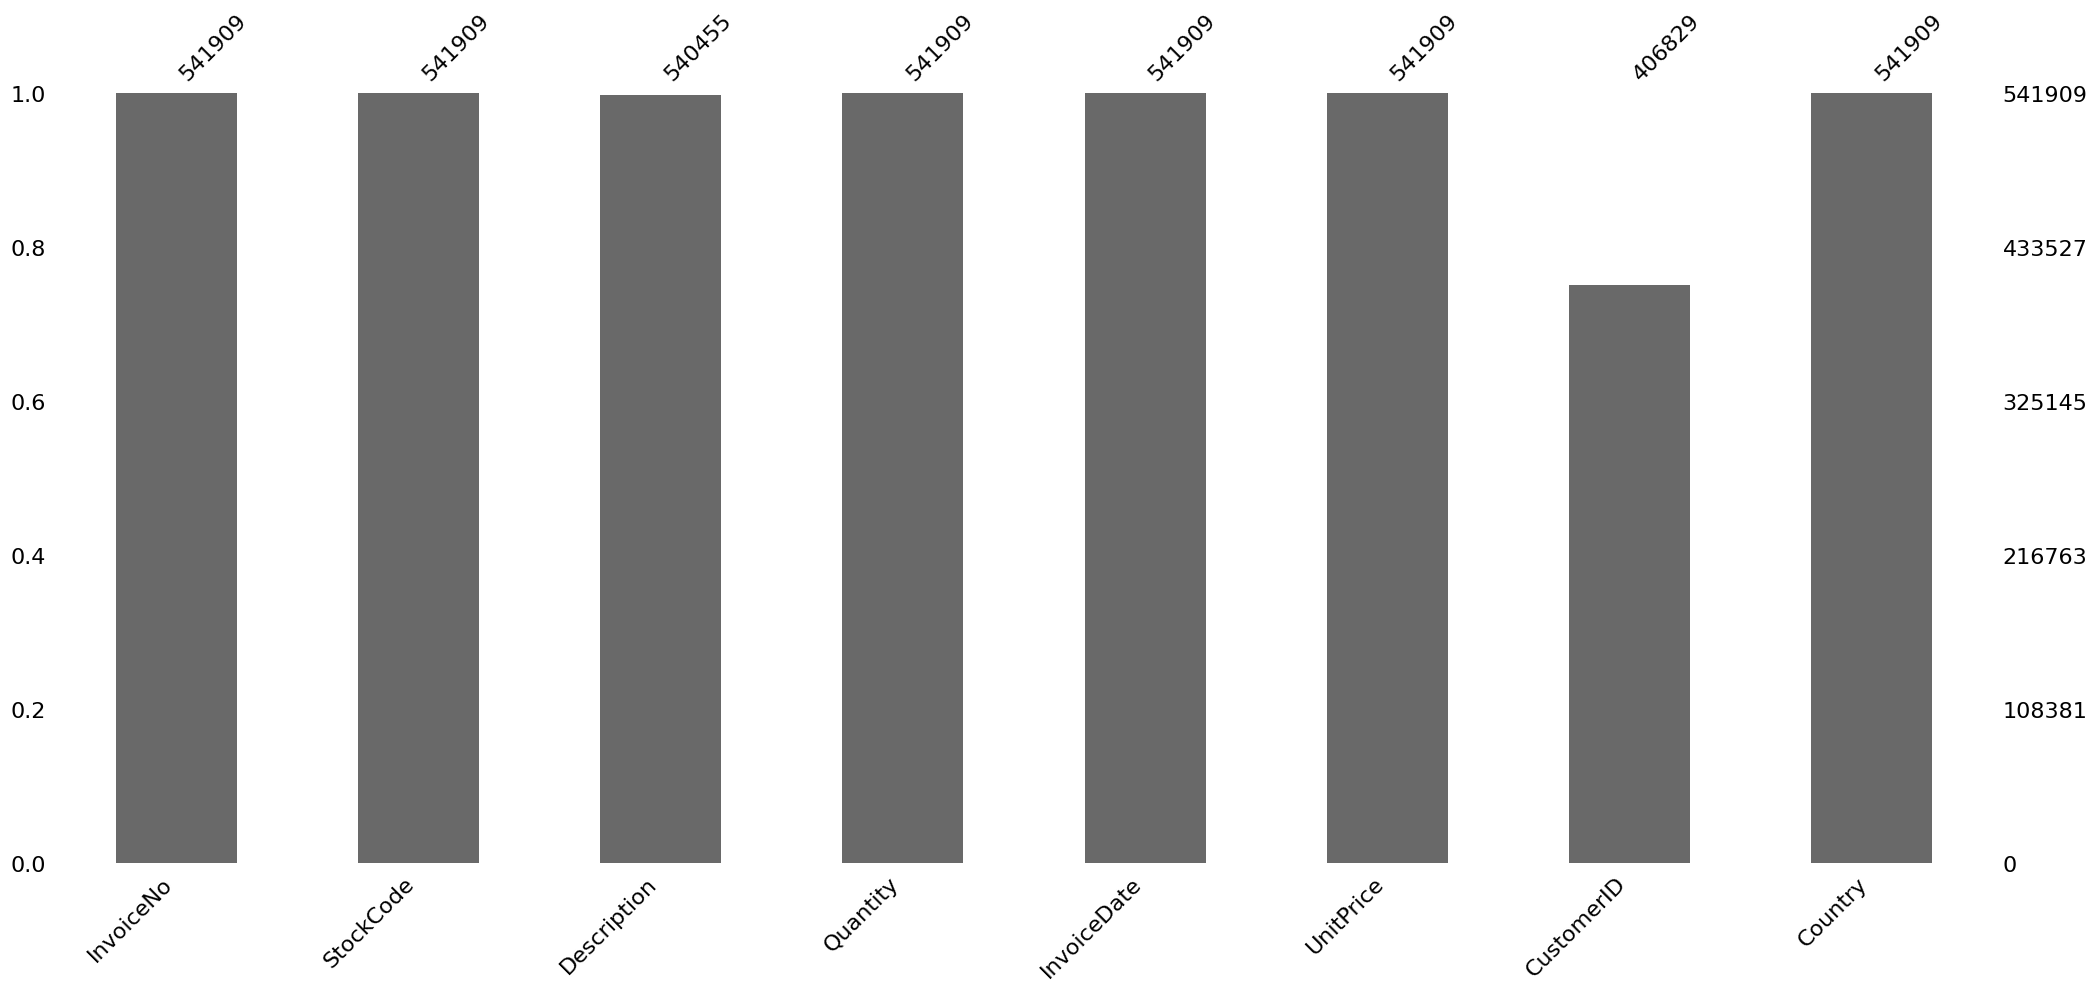

In [ ]:
#visualization of missing values
msno.bar(customer_df)

135080 null values are present in customeID Feature.

## What did you know about your dataset?

*   There are 541909 total observations with 8 different features.
*   Features like, CustomerID and Decription has a null values.
*   There are duplicate values i.e,5268 duplicate data.



# **2.Understanding Your Variables**

In [ ]:
#dataset columns present in our dataset
print(f'Features: {customer_df.columns.to_list()}')

Features: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
#dataset decription
customer_df.describe(include='all').T

count   unique                                 top    freq  \
InvoiceNo    541909.0  25900.0                            573585.0  1114.0   
StockCode      541909     4070                              85123A    2313   
Description    540455     4223  WHITE HANGING HEART T-LIGHT HOLDER    2369   
Quantity     541909.0      NaN                                 NaN     NaN   
InvoiceDate    541909    23260                 2011-10-31 14:41:00    1114   
UnitPrice    541909.0      NaN                                 NaN     NaN   
CustomerID   406829.0      NaN                                 NaN     NaN   
Country        541909       38                      United Kingdom  495478   

                          first                last         mean          std  \
InvoiceNo                   NaT                 NaT          NaN          NaN   
StockCode                   NaT                 NaT          NaN          NaN   
Description                 NaT                 NaT          NaN          NaN   
Quantity                    NaT                 NaT      9.55225   218.081158   
InvoiceDate 2010-12-01 08:26:00 2011-12-09 12:50:00          NaN          NaN   
UnitPrice                   NaT                 NaT     4.611114    96.759853   
CustomerID                  NaT                 NaT  15287.69057  1713.600303   
Country                     NaT                 NaT          NaN          NaN   

                  min      25%      50%      75%      max  
InvoiceNo         NaN      NaN      NaN      NaN      NaN  
StockCode         NaN      NaN      NaN      NaN      NaN  
Description       NaN      NaN      NaN      NaN      NaN  
Quantity     -80995.0      1.0      3.0     10.0  80995.0  
InvoiceDate       NaN      NaN      NaN      NaN      NaN  
UnitPrice   -11062.06     1.25     2.08     4.13  38970.0  
CustomerID    12346.0  13953.0  15152.0  16791.0  18287.0  
Country           NaN      NaN      NaN      NaN      NaN

## Variable Description

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal, the name of the country where each customer resides.





## Checking Unique Values For Each Variable

In [ ]:
#Unique values for each variable
for i in customer_df.columns.tolist():
  print(f'Number of unique value in {i} is {customer_df[i].nunique()}.')

Number of unique value in InvoiceNo is 25900.
Number of unique value in StockCode is 4070.
Number of unique value in Description is 4223.
Number of unique value in Quantity is 722.
Number of unique value in InvoiceDate is 23260.
Number of unique value in UnitPrice is 1630.
Number of unique value in CustomerID is 4372.
Number of unique value in Country is 38.


# **3.Data Cleaning And Feature Engineering**

## Droping Unnecessary Columns

In [ ]:
#count percentage wise missing values
def missing_value_check(df):
  per_miss_values = customer_df.isnull().sum() * 100 / len(customer_df)
  miss_values_df = pd.DataFrame({'Feature_name':customer_df.columns,
                                 'percentage':per_miss_values})
  return miss_values_df.sort_values('percentage',ascending=False)

In [ ]:
#checking percentage wise missing values
missing_value_check(customer_df)

Feature_name  percentage
CustomerID    CustomerID   24.926694
Description  Description    0.268311
InvoiceNo      InvoiceNo    0.000000
StockCode      StockCode    0.000000
Quantity        Quantity    0.000000
InvoiceDate  InvoiceDate    0.000000
UnitPrice      UnitPrice    0.000000
Country          Country    0.000000

24.93% of items purchases are not assigned to any customer Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

In [ ]:
# Dropping the rows with null values
customer_df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
# Dropping duplicate rows
customer_df.drop_duplicates(inplace=True)

In [ ]:
customer_df['Year'] = customer_df["InvoiceDate"].apply(lambda x:x.year)
customer_df['Month'] = customer_df["InvoiceDate"].apply(lambda x:x.month_name())
customer_df['Day'] = customer_df["InvoiceDate"].apply(lambda x:x.day_name())
customer_df['Hour'] = customer_df["InvoiceDate"].apply(lambda x:x.hour)

In [ ]:
customer_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  Hour  
0  Wednesday     8  
1  Wednesday     8  
2  Wednesday     8  
3  Wednesday     8  
4  Wednesday     8

In [ ]:
#creating TotalAmount feature which multiplication of quantity and unitprice
customer_df['TotalAmount'] = customer_df['Quantity'] * customer_df['UnitPrice']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
customer_df['TimeType'] = np.where((customer_df["Hour"]>5)&(customer_df["Hour"]<18), np.where(
                           customer_df["Hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
#get cancellation data
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')
cancellations_data = customer_df[customer_df['InvoiceNo'].str.contains('C')]
cancellations_data.shape

(8872, 14)

In [ ]:
# Dropping cancellations from the main dataframe
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]


In [ ]:
customer_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  Hour  TotalAmount TimeType  
0  Wednesday     8        15.30  Morning  
1  Wednesday     8        20.34  Morning  
2  Wednesday     8        22.00  Morning  
3  Wednesday     8        20.34  Morning  
4  Wednesday     8        20.34  Morning

In [ ]:
cancellations_data.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  Year  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   

        Month        Day  Hour  TotalAmount TimeType  
141  December  Wednesday     9       -27.50  Morning  
154  December  Wednesday     9        -4.65  Morning  
235  December  Wednesday    10       -19.80  Morning  
236  December  Wednesday    10        -6.96  Morning  
237  December  Wednesday    10        -6.96  Morning

# **4.Exploratory Data Analysis**

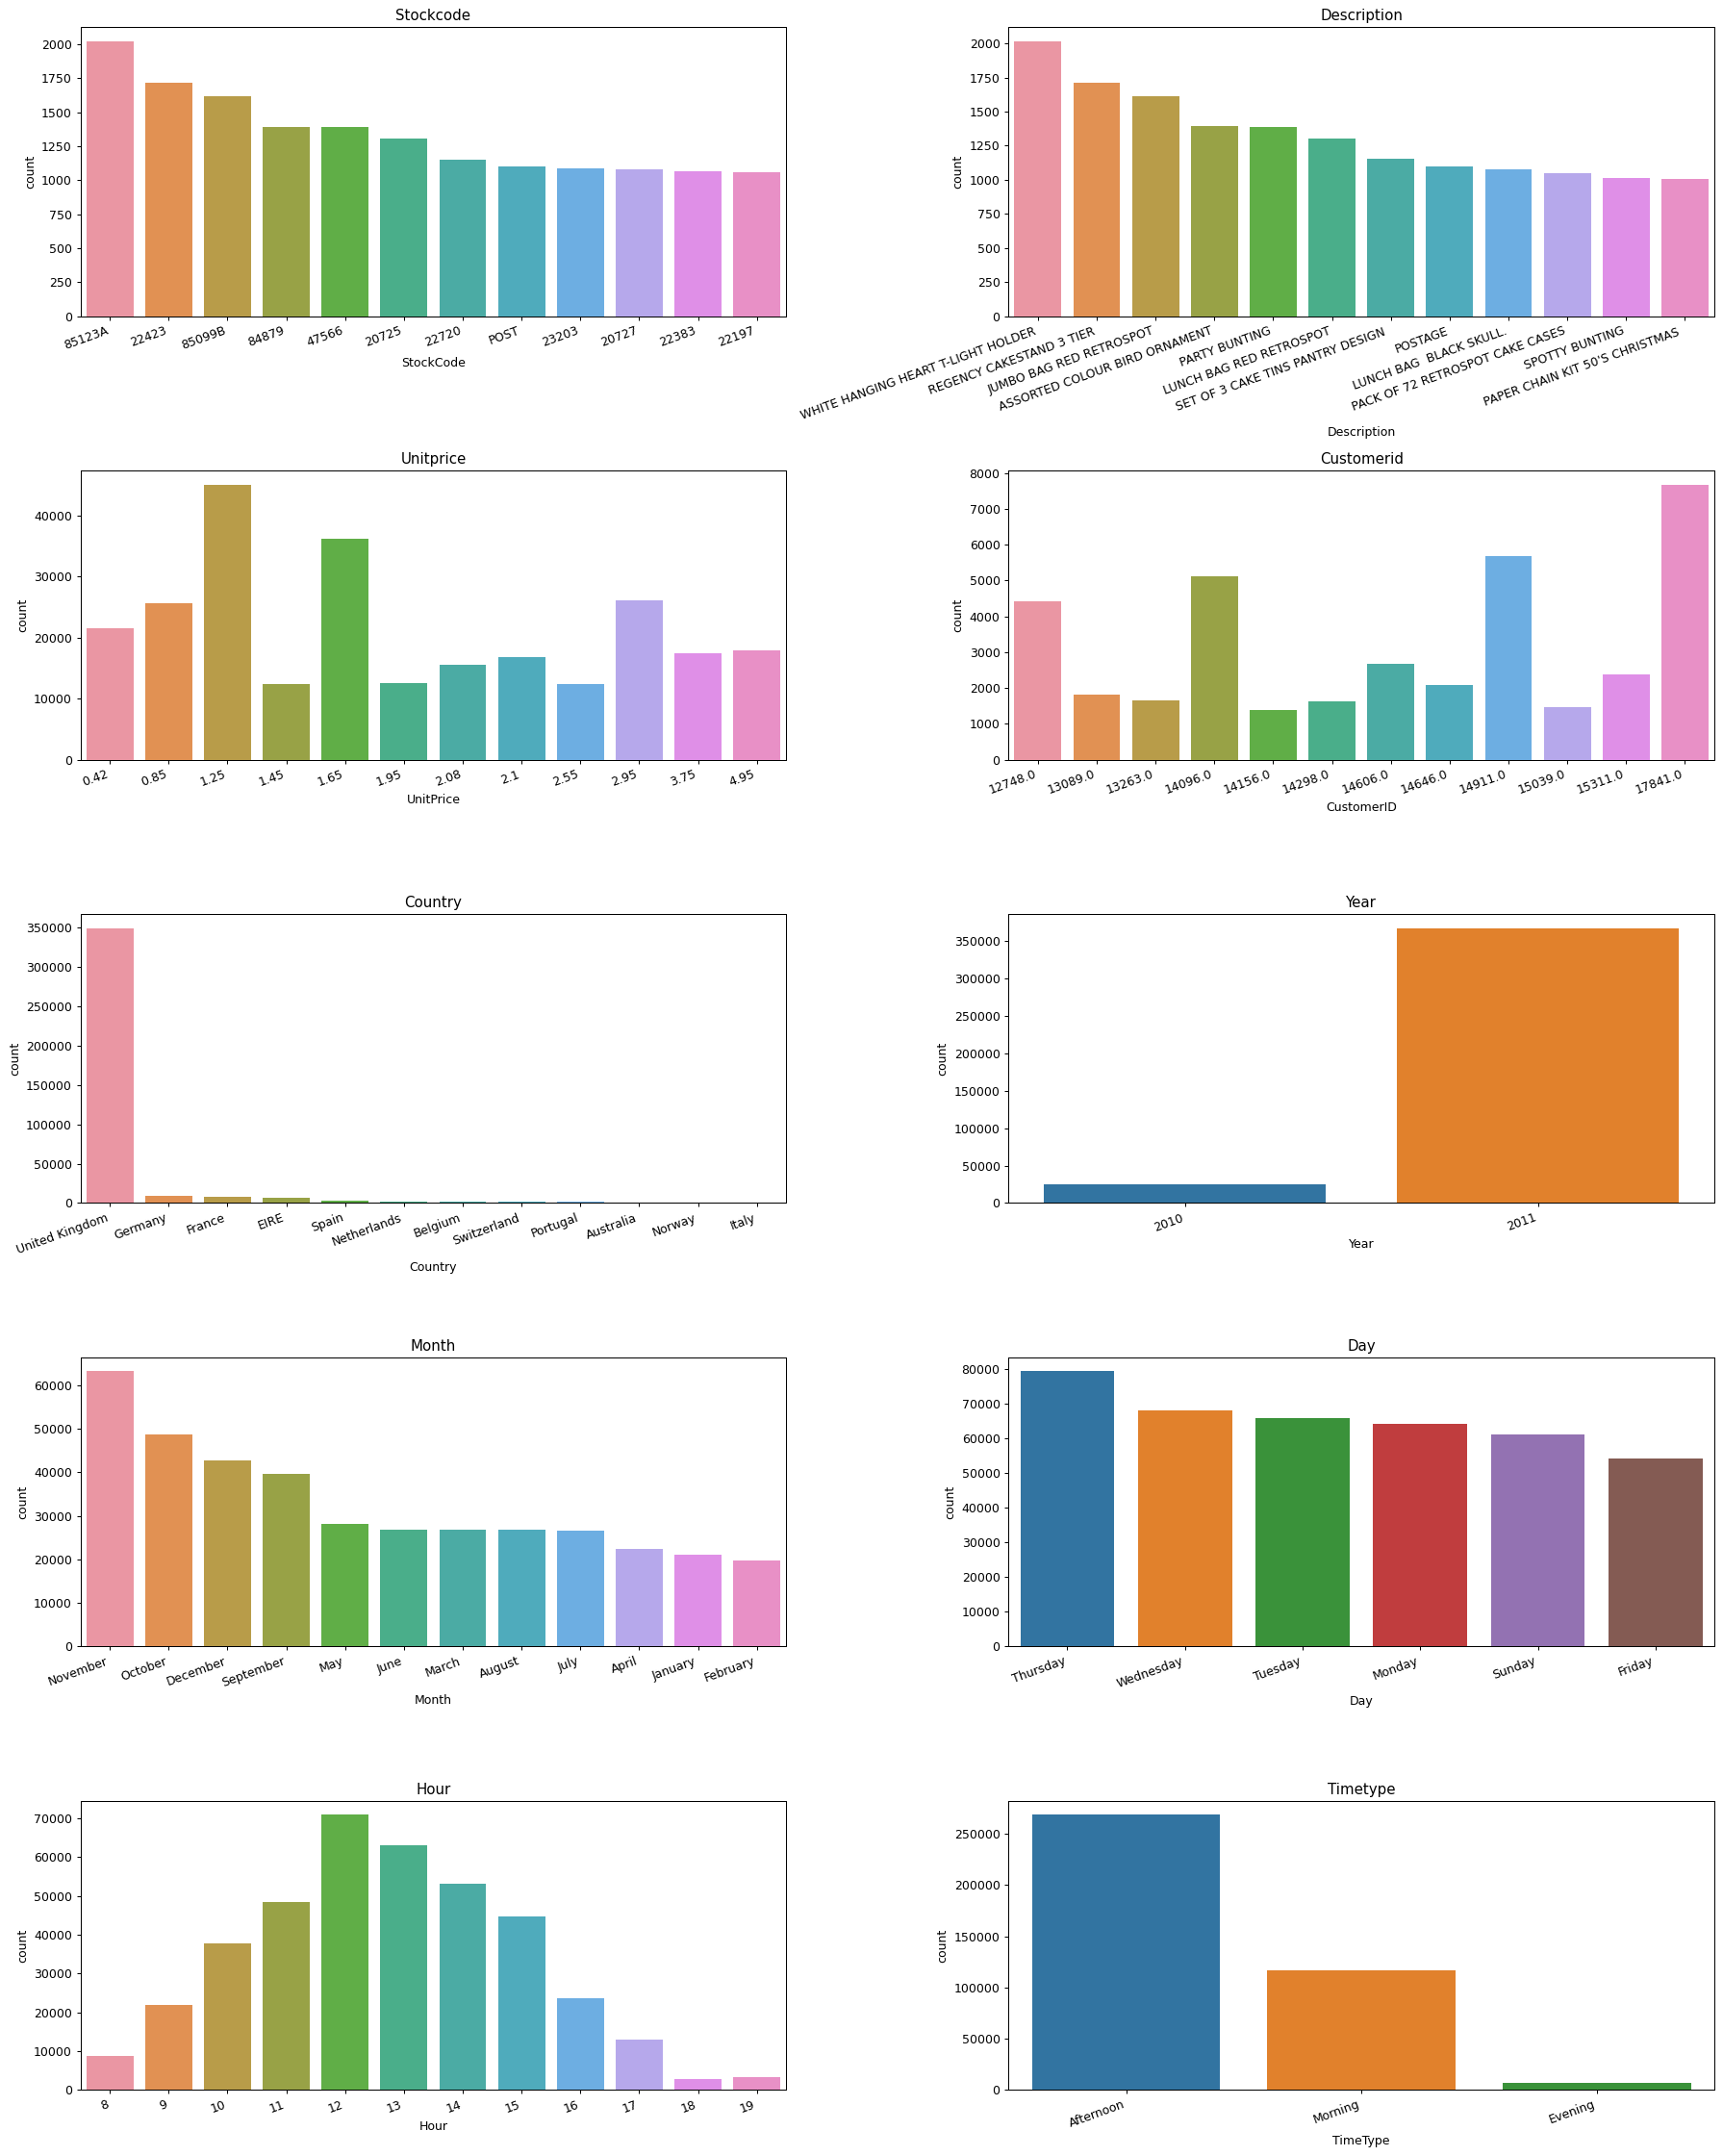

In [ ]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'Year', 'Month','Day','Hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = customer_df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)

  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()



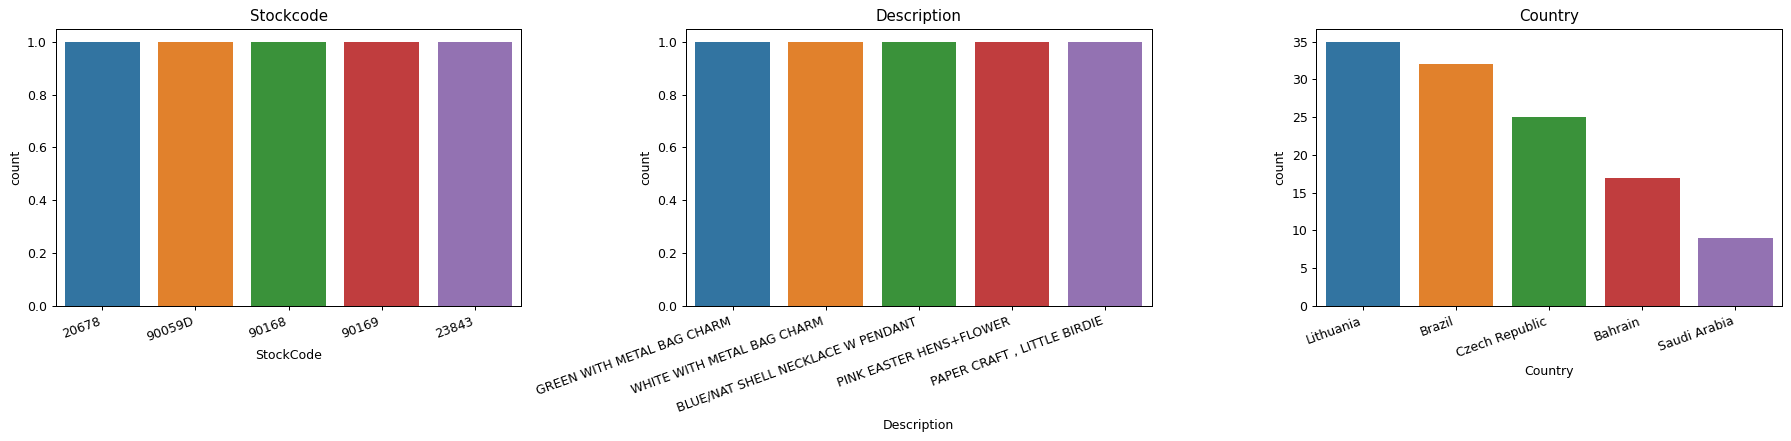

In [ ]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = customer_df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

* Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.

* There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.

* Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.

* Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.

* WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products.









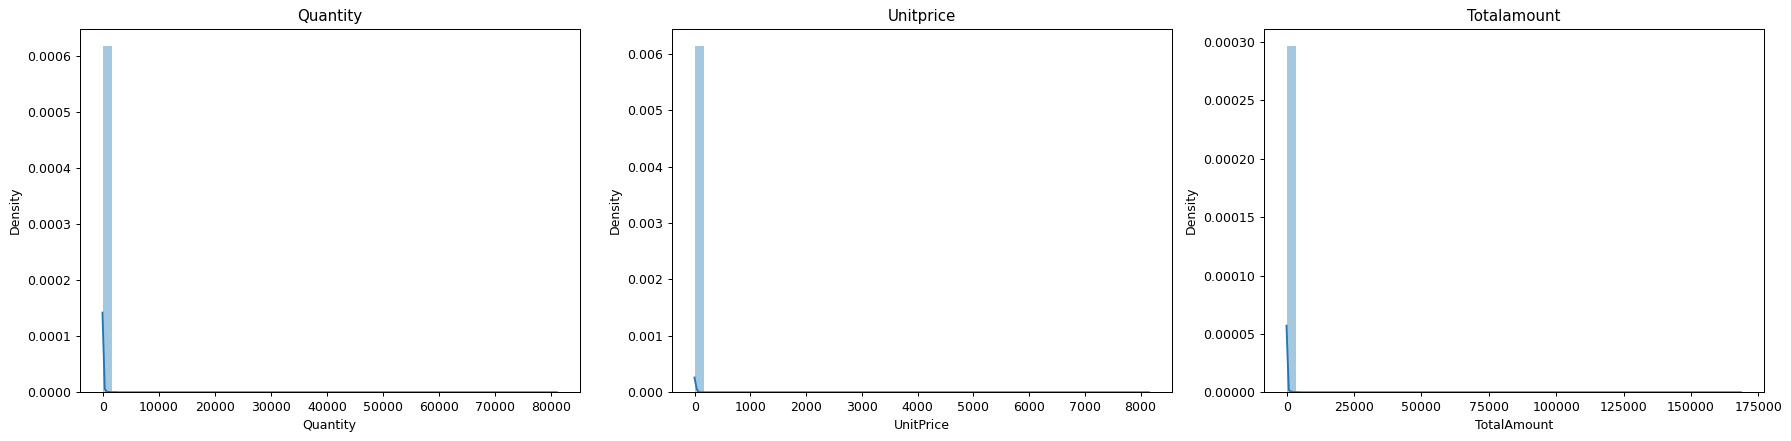

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(customer_df[col])
  plt.title(col.title())
  plt.tight_layout()

It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode2. For symmetric graph mean=median=mode

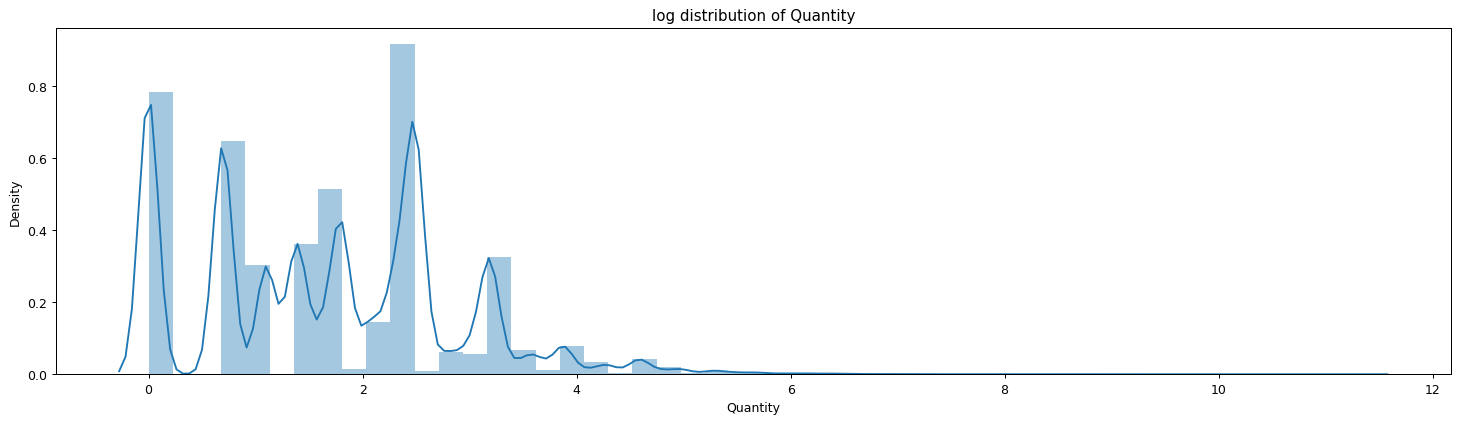

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_df['Quantity']))
plt.show()


In [ ]:
#most order placed country
country_invoices = customer_df.groupby('Country').nunique()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoices.rename(columns={'InvoiceNo':'Invoice_Count'},inplace=True)
country_invoices.head(10)

Country  Invoice_Count
35  United Kingdom          16649
14         Germany            457
13          France            389
10            EIRE            260
3          Belgium             98
23     Netherlands             95
30           Spain             90
0        Australia             57
26        Portugal             57
32     Switzerland             51

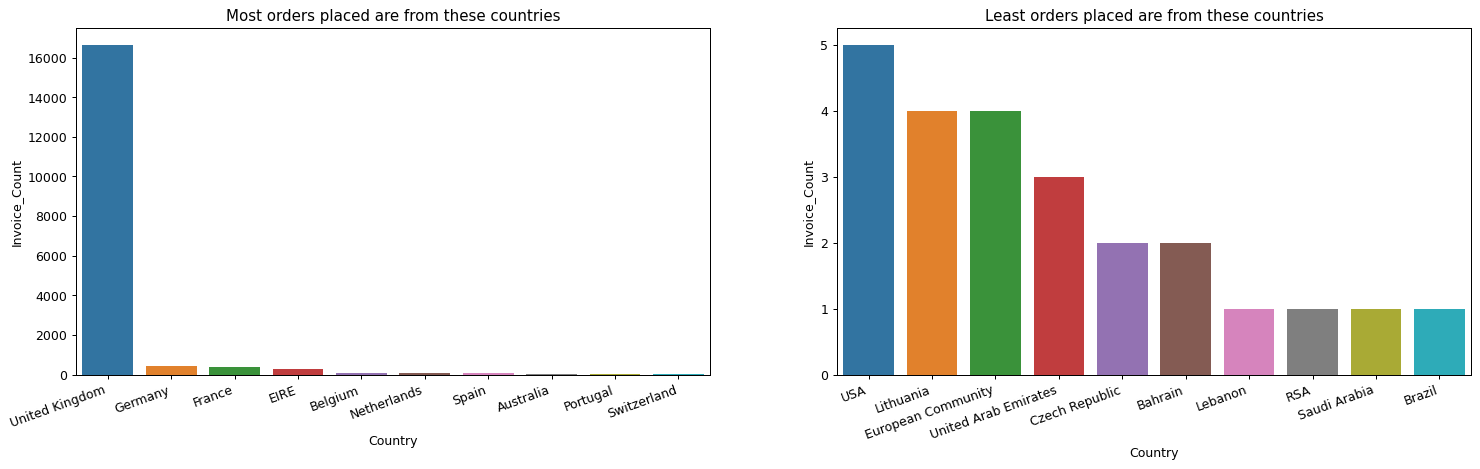

In [ ]:

# Visualizing top and bottom 10 countries based on total invoices
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoices.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoices.tail(10),x="Country",y="Invoice_Count")
plt.show()

From above graph ,we conclude that

United Kingdom is making most of the purchases as compared to other countries.

In [ ]:
#country wise customer count
customer_cunt = customer_df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
customer_cunt.rename(columns={'CustomerID':'Customer_Count'},inplace=True)
customer_cunt.head()

Country  Customer_Count
36  United Kingdom            3950
14         Germany              95
13          France              87
31           Spain              31
3          Belgium              25

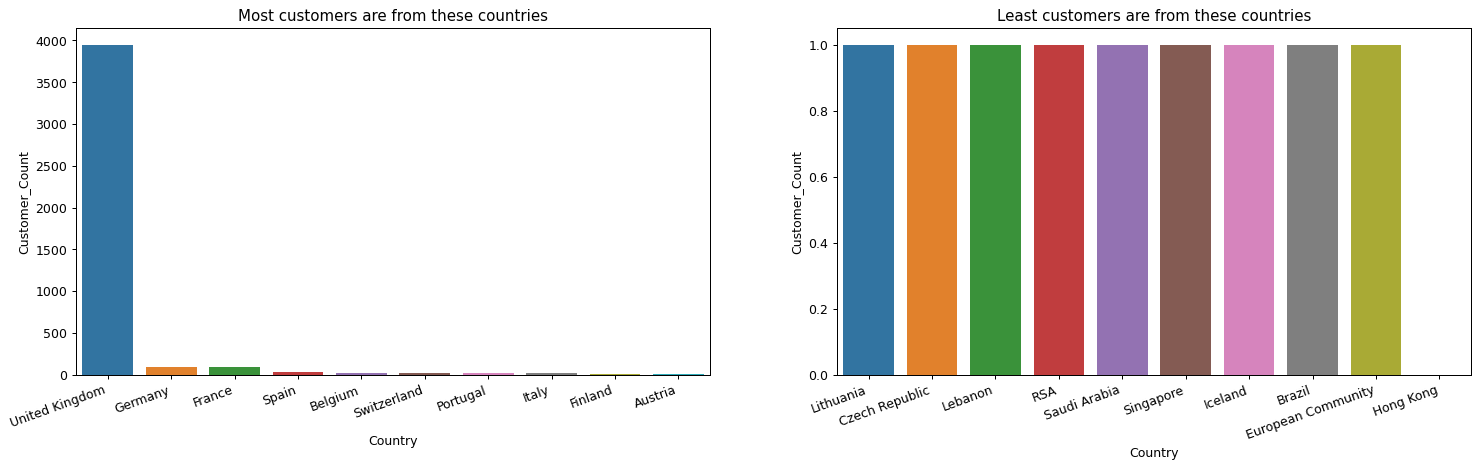

In [ ]:
#visualization of country wise customer count
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=customer_cunt.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=customer_cunt.tail(10),x="Country",y="Customer_Count")
plt.show()

From above graph,we can conclude that,

United Kingdom has most number of customers.

In [ ]:
# Countrywise average item purchases
country_quant = customer_df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quant.rename(columns={'Quantity':'Avg_Quantity'},inplace=True)
country_quant.head()

Country  Avg_Quantity
24  Netherlands     84.406580
32       Sweden     77.136364
20        Japan     70.441341
0     Australia     66.444003
30    Singapore     22.855895

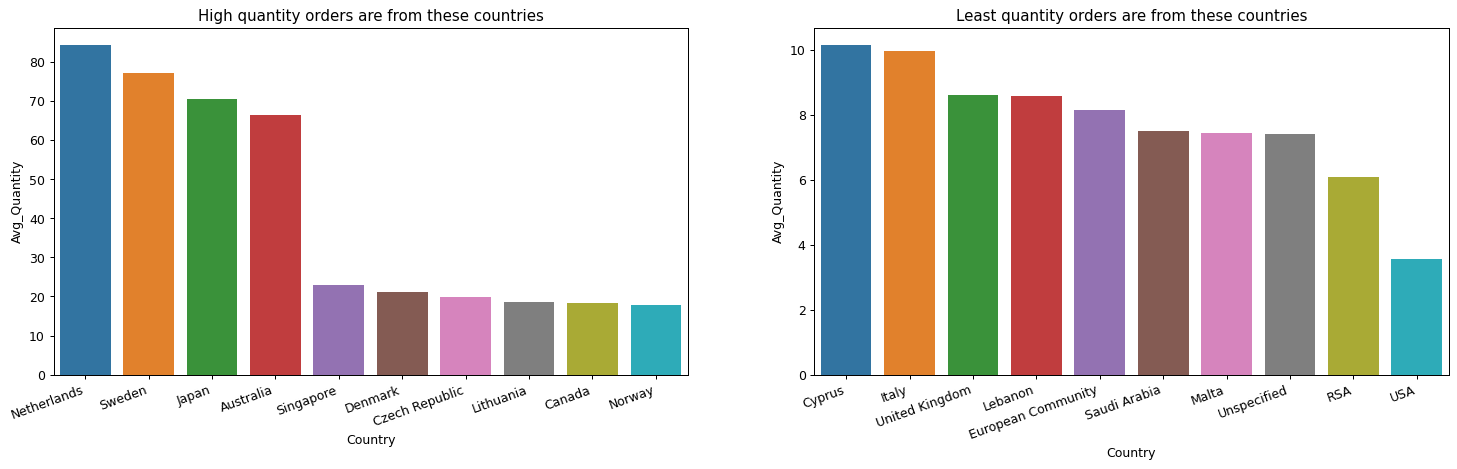

In [ ]:
# Visualizing top and bottom 10 countries based on average item purchases
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quant.head(10),x="Country",y="Avg_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least quantity orders are from these countries")
sns.barplot(data=country_quant.tail(10),x="Country",y="Avg_Quantity")
plt.show()

From above graph,we can conclude that,

Orders with mass quantity are placed by the customers from Netherlands.

In [ ]:
#qauntity wise item purchase
items_quantity = customer_df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
items_quantity.head()


Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1762             JUMBO BAG RED RETROSPOT     46078
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706

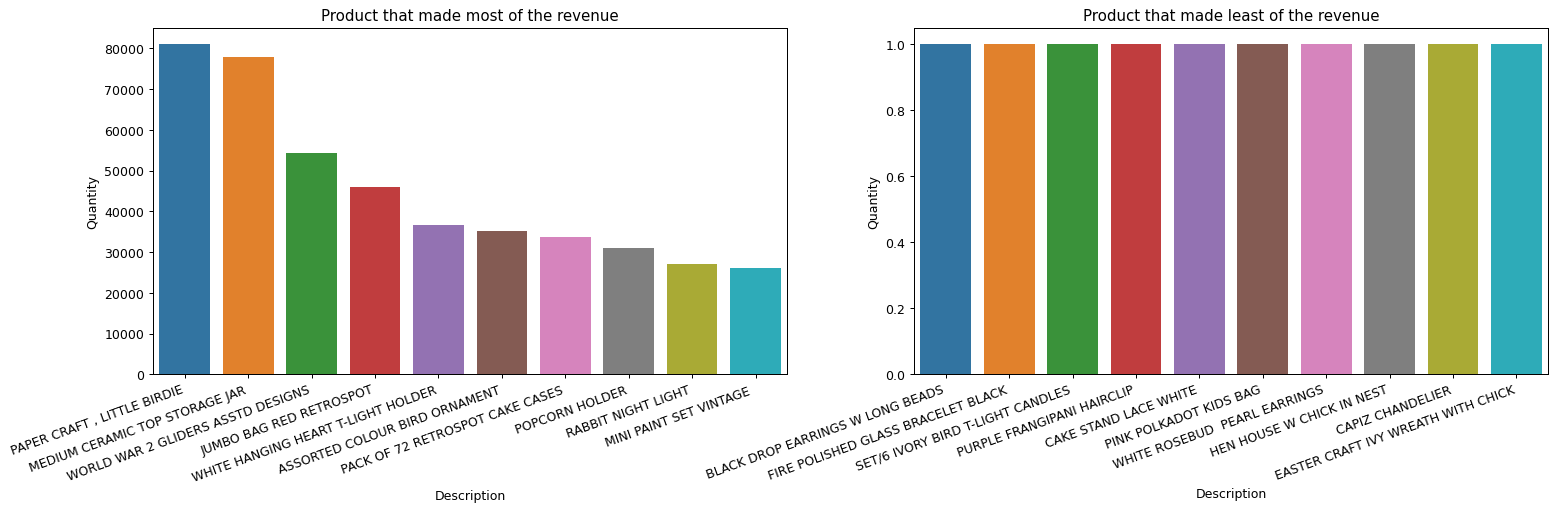

In [ ]:
#visualization top and bottom 10 items based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=items_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least of the revenue")
sns.barplot(data=items_quantity.tail(10),x="Description",y="Quantity")
plt.show()

From above graph,we can conclude that,

PAPER CRAFT,LITTLE BRIDIE product that made most of the revenue.

In [ ]:
# Amount wise item purchases
product_price = customer_df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1762             JUMBO BAG RED RETROSPOT     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

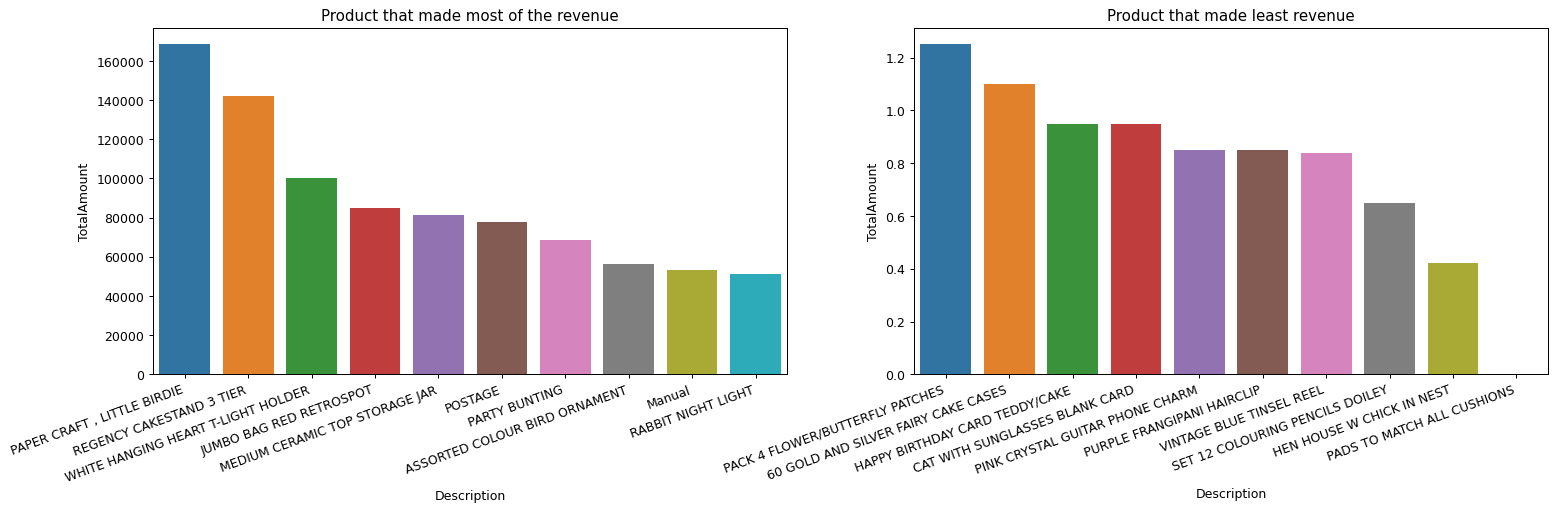

In [ ]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [ ]:
# customer wise item purchases
product_customer = customer_df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()


Description  Customer_Count
2767            REGENCY CAKESTAND 3 TIER             881
3698  WHITE HANGING HEART T-LIGHT HOLDER             856
2345                       PARTY BUNTING             708
216        ASSORTED COLOUR BIRD ORNAMENT             678
3001   SET OF 3 CAKE TINS PANTRY DESIGN              640

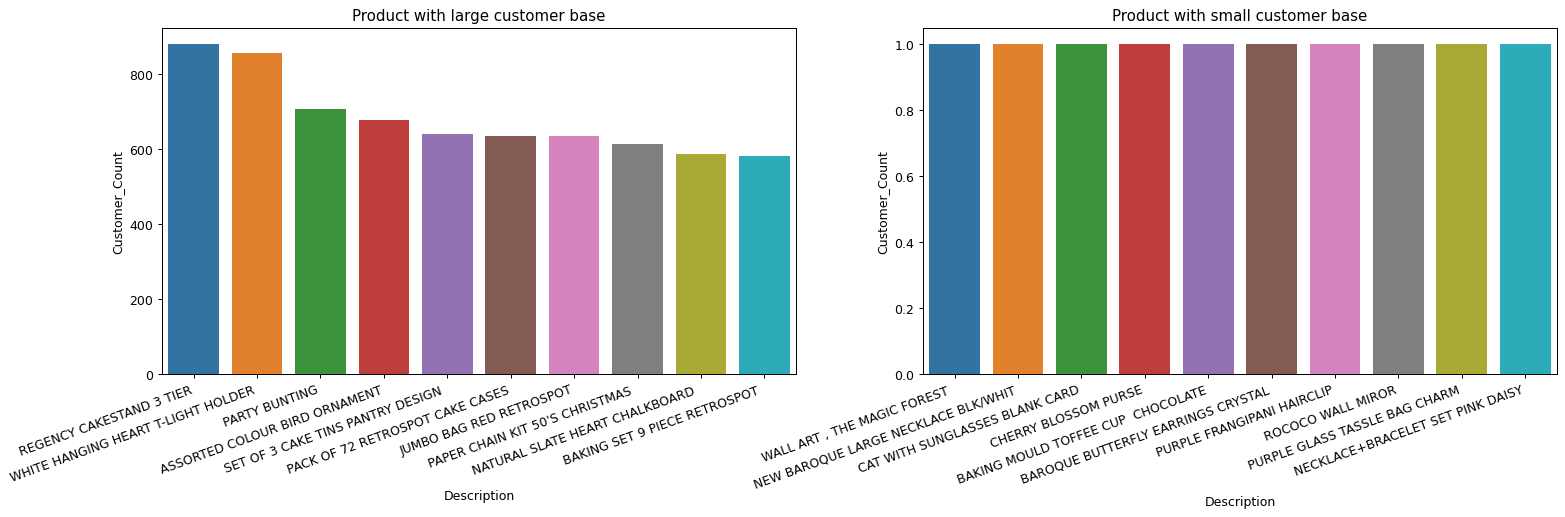

In [ ]:
 #Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

From above graph,we can conclude that,

REGENCY CAKESTAND 3 TIER product purchase rate is very high as comapared to other products.

In [ ]:
# Checking the number of cancellations by each customer.
customer_cancellations = cancellations_data.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101

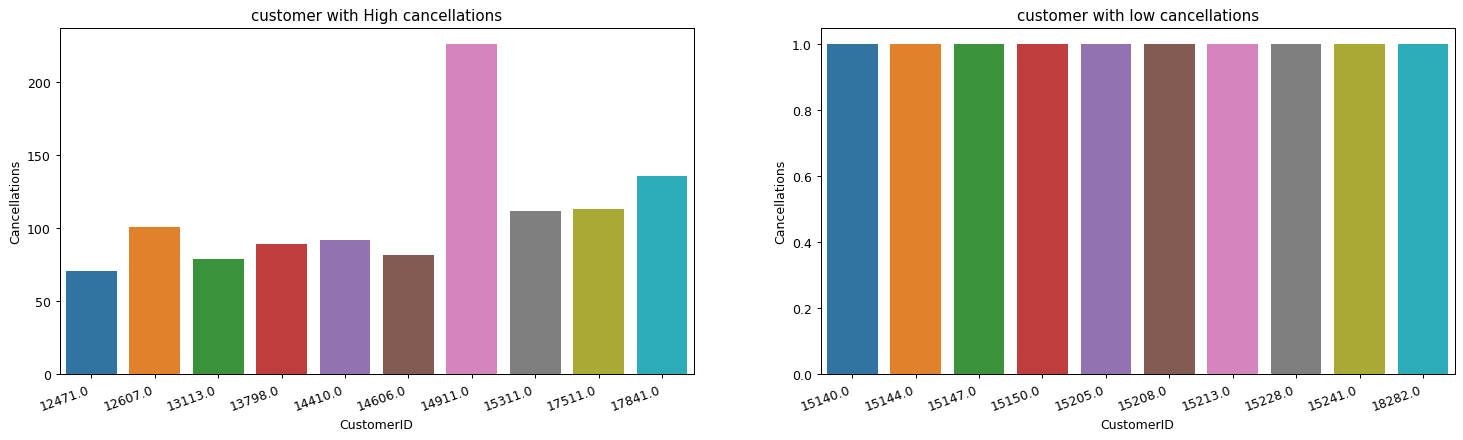

In [ ]:
# Visualizing top and bottom 10 customers based on cancellations
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

From above graph ,we can conclude that,

Highest number of cancellation is doing by customerID 14911.

In [ ]:
# Checking the number of cancellations countrywise.
country_cancellations = cancellations_data.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7501
11         Germany            453
7             EIRE            247
10          France            148
26             USA            112

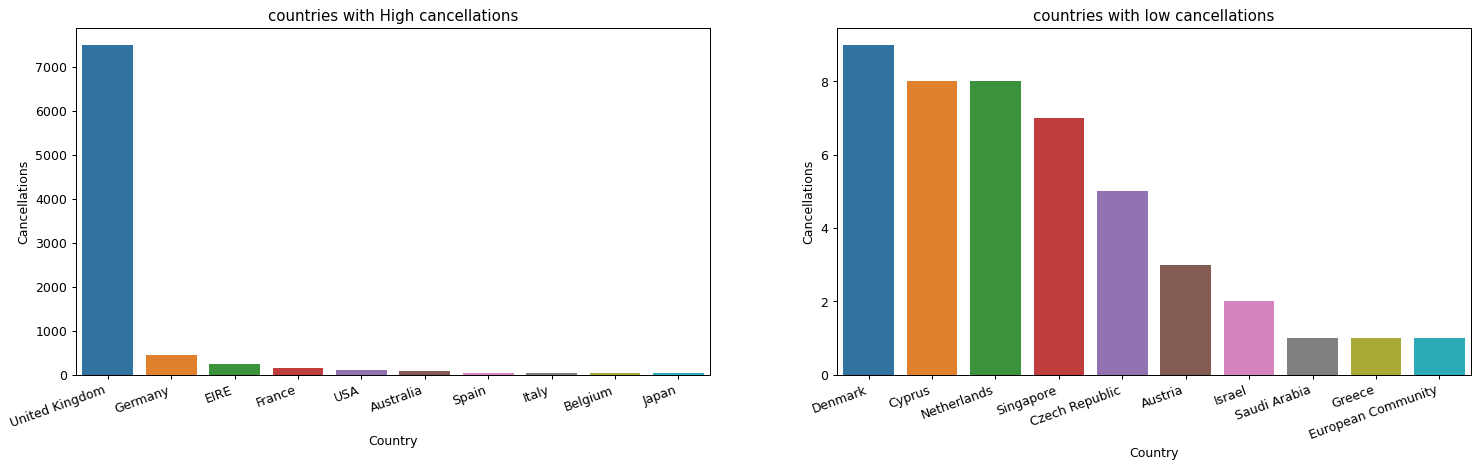

In [ ]:
# Visualizing top and bottom 10 countries based on cancellations
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

From above graph,we can conclude that,

Uk has a highest cancellation rate.

# **5.RFM Modeling**

* RFM (Recency, Frequency, Monetary) modeling is a statistical technique used in marketing and customer relationship management to analyze customer behavior and determine the value of each customer to a business. It involves analyzing the transactional data of customers and grouping them based on their buying behavior.

* Recency refers to how recently a customer has made a purchase from the business. Frequency refers to how often a customer makes purchases, and Monetary refers to how much a customer spends on purchases. These three factors are used to assign scores to each customer, which are then used to segment them into different groups.

* In general, customers who have made recent purchases, purchase frequently, and spend more money are considered to be more valuable to the business than those who have not made a purchase recently, purchase infrequently, and spend less money. RFM modeling helps businesses identify their most valuable customers and tailor their marketing efforts accordingly, such as by offering personalized promotions or improving customer service.

* RFM modeling can be performed using various statistical techniques, such as clustering or decision tree analysis. However, it requires accurate and up-to-date data on customer transactions, and the results may need to be validated and updated periodically to reflect changes in customer behavior.

In [ ]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = customer_df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)


In [ ]:
# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']


In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()


Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

* If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.

* If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.

* If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.

* Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

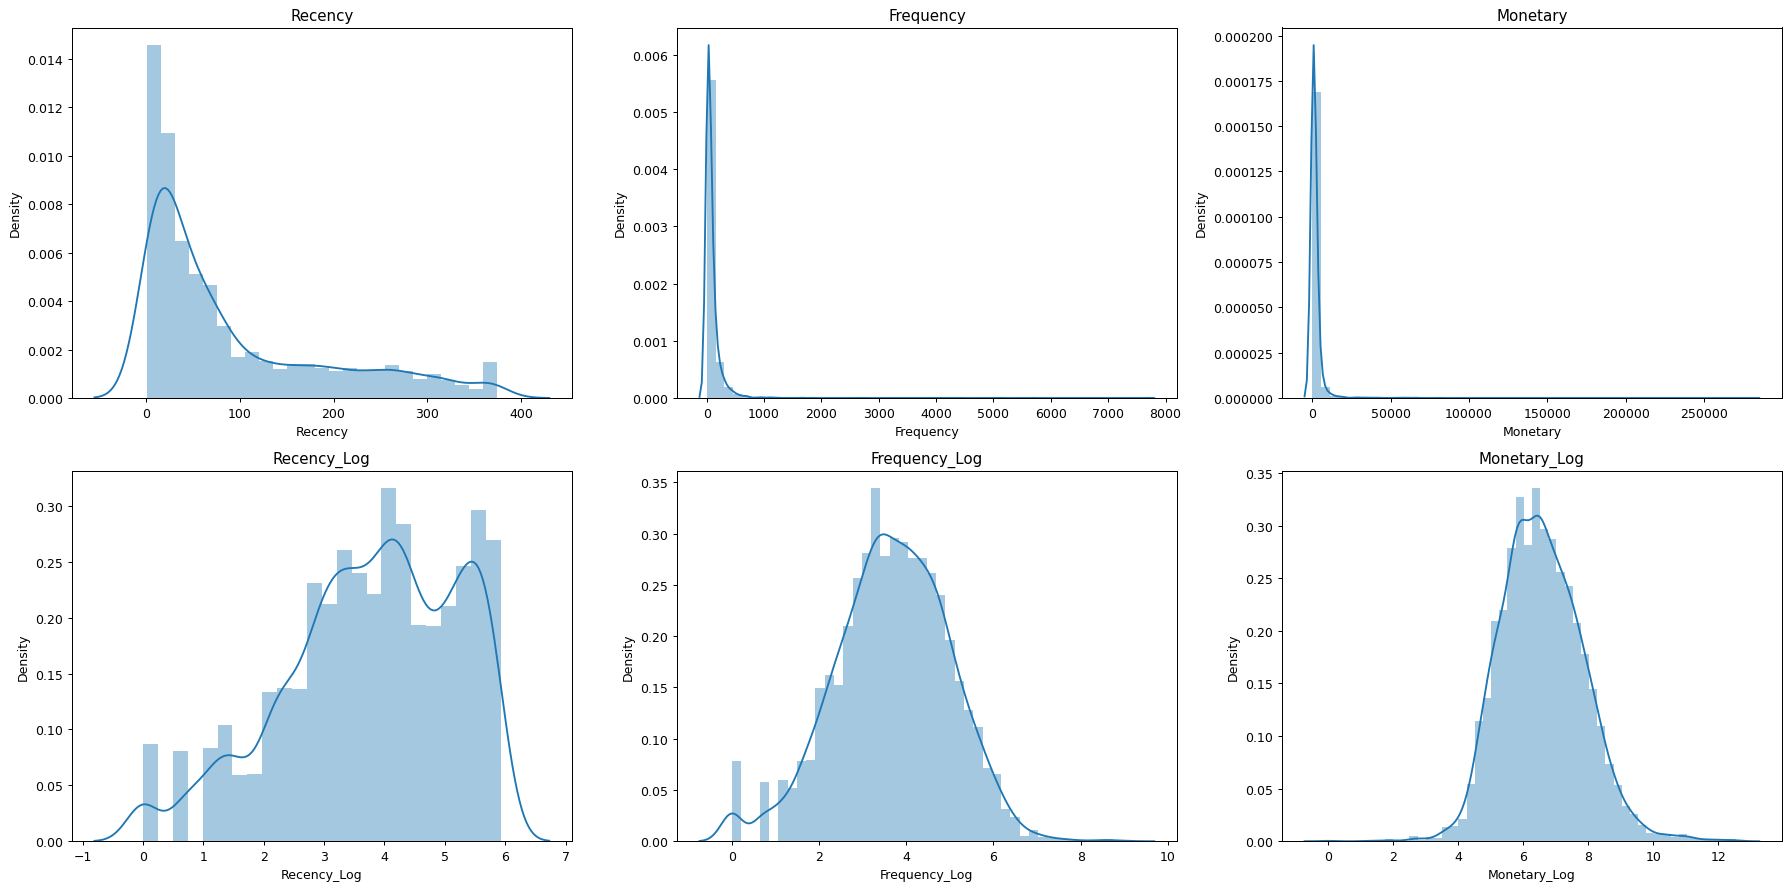

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

* Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.

* It will be more suitable to use the transformed features for better visualisation of clusters.

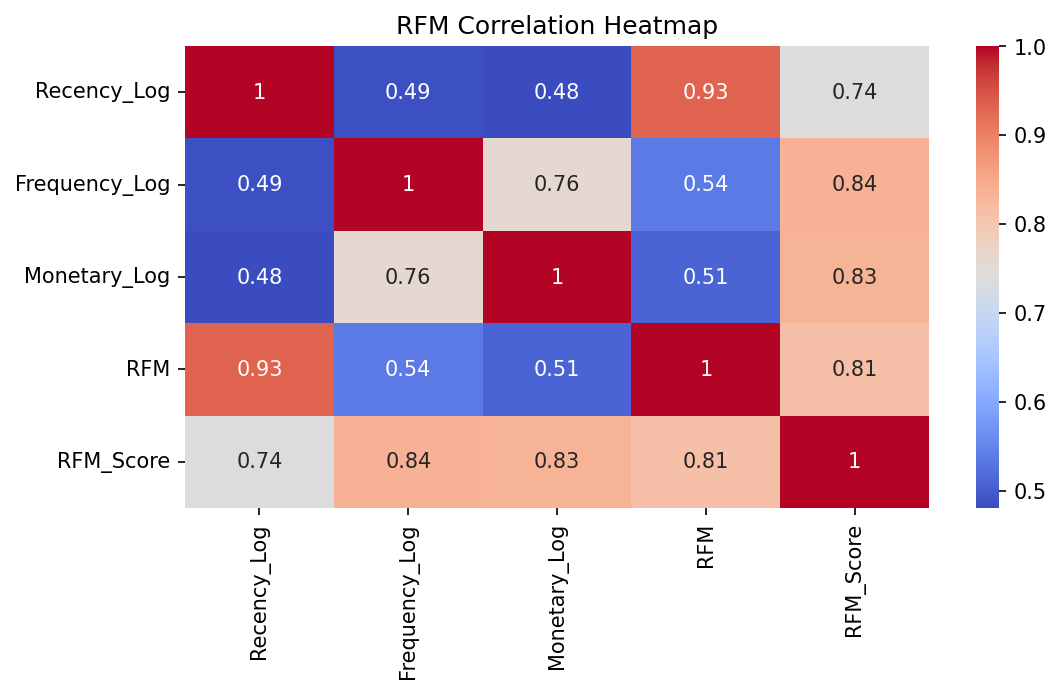

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4), dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **6.Clustering Algorithms**

## Prerequisites

In [ ]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [ ]:
# Initializing an empty dictionary to store the stats and summary for all clusters
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  # Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, er,title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name)

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap=er))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap=er))

  return stats, summary

# Binning RFM_Score

* Binning RFM (Recency, Frequency, Monetary) scores involves grouping customers based on their RFM scores into segments or bins. RFM scores are commonly used in customer segmentation as they provide valuable insights into customer behavior and can help identify high-value customers, frequent shoppers, and potential churners

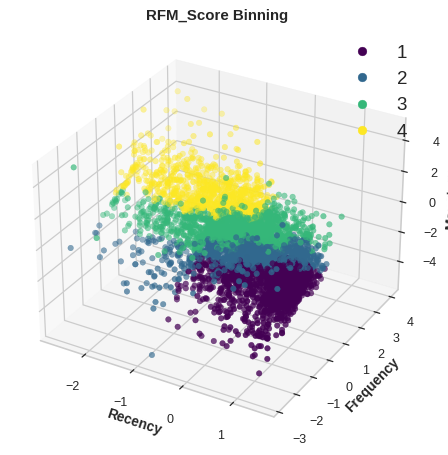

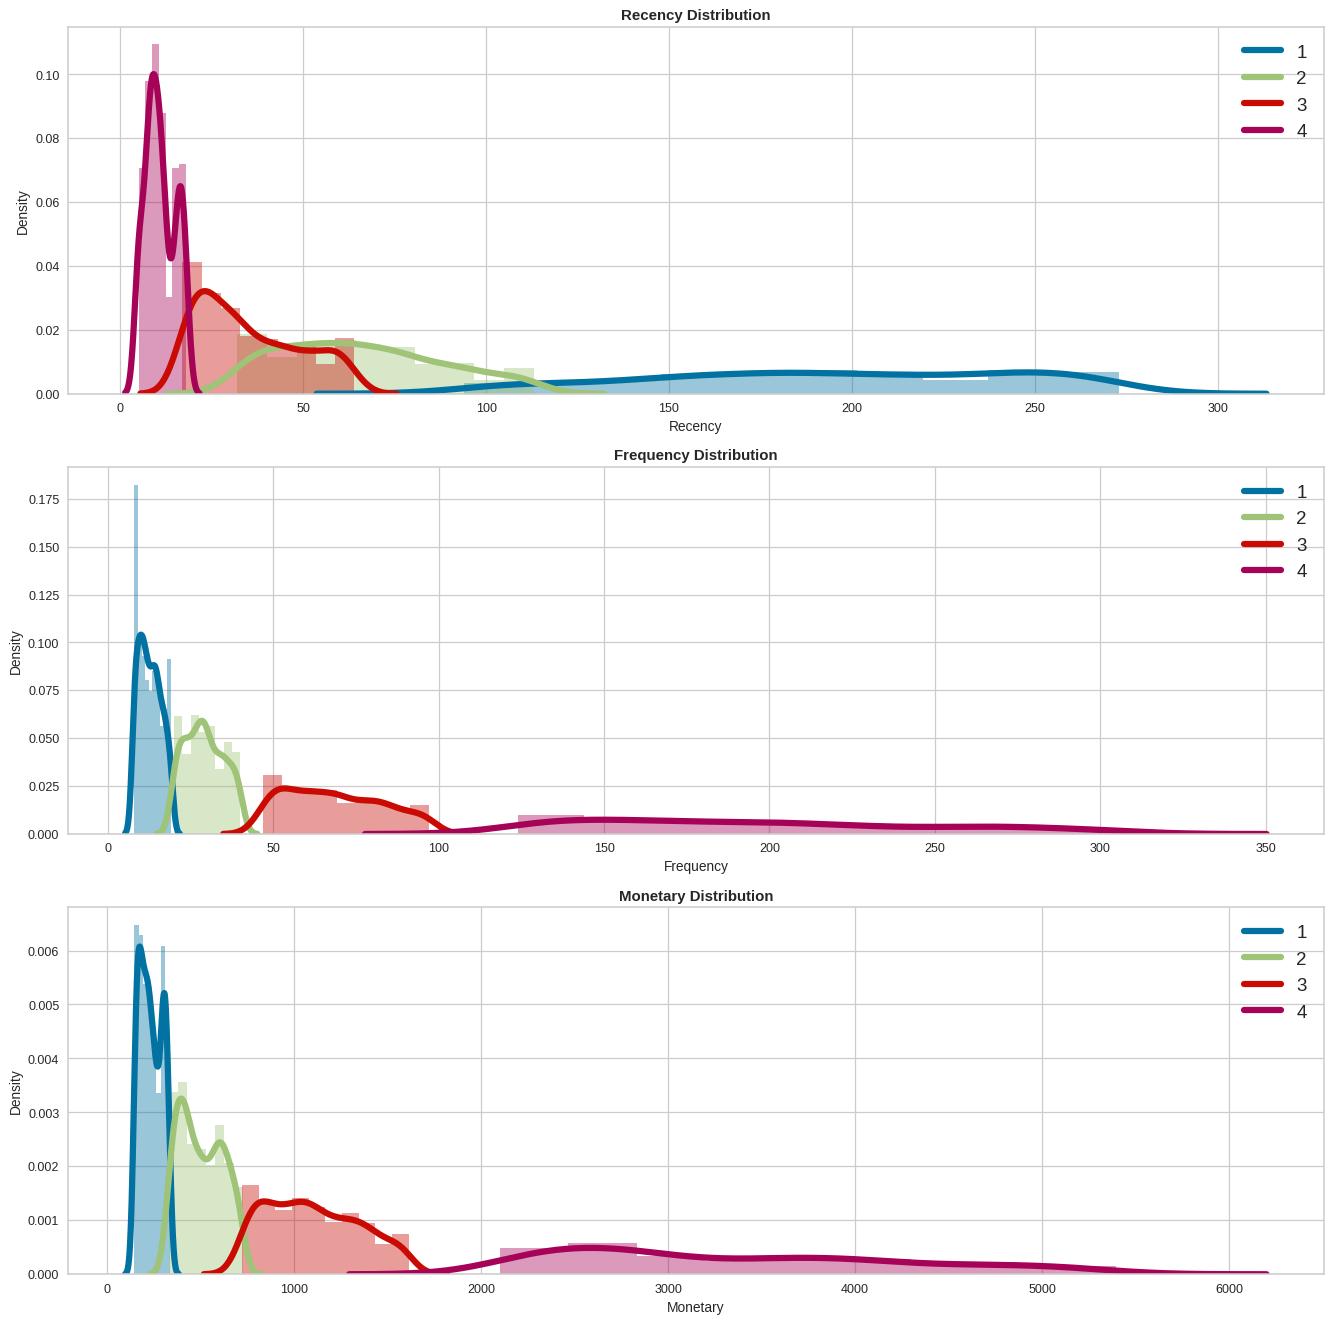



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
color='Oranges'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)


# Quantile Based Clustering

* Quantile-based clustering is a clustering technique that groups data points into clusters based on their distribution within quantiles. Quantiles are the values that divide a dataset into equal-sized groups. For example, the median is the 50th percentile or 2nd quantile.

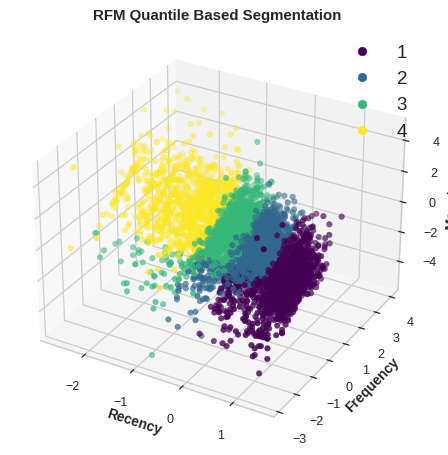

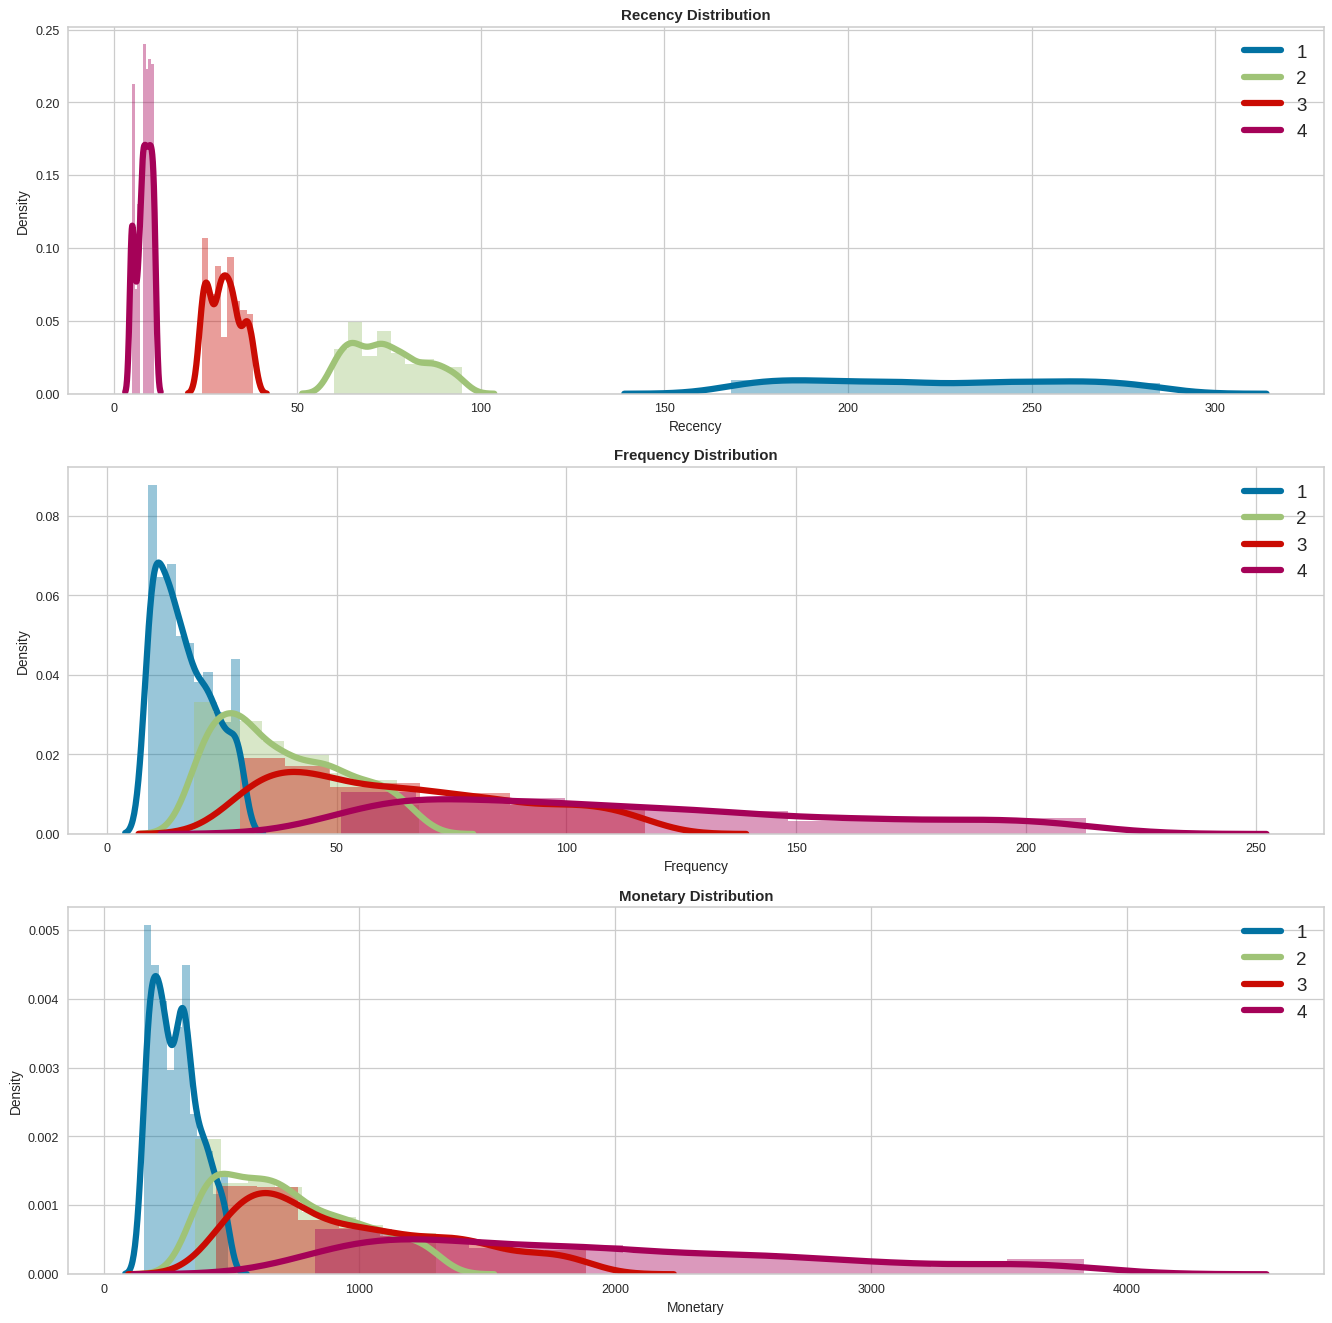



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
color='BuPu'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## K-Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping data points based on their similarity. It is a partition-based clustering method that aims to partition a dataset into K clusters, where K is a predefined number.

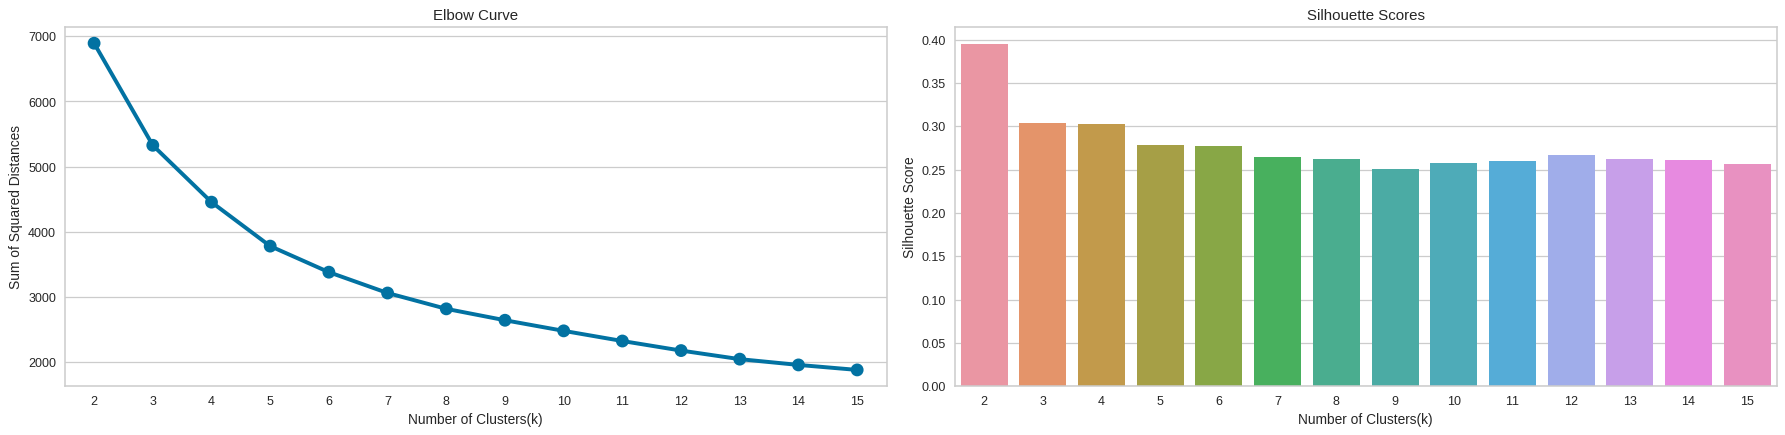

In [ ]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

 * From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.

 * If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen.

 * If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

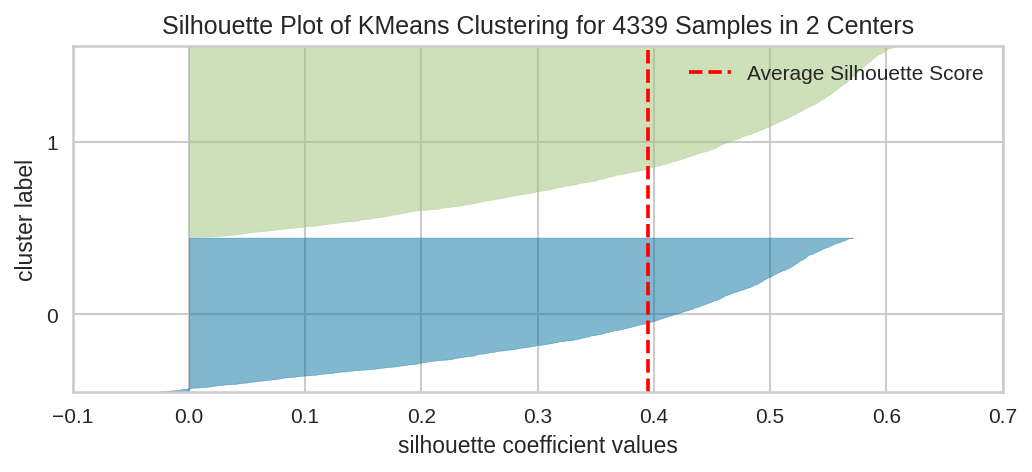

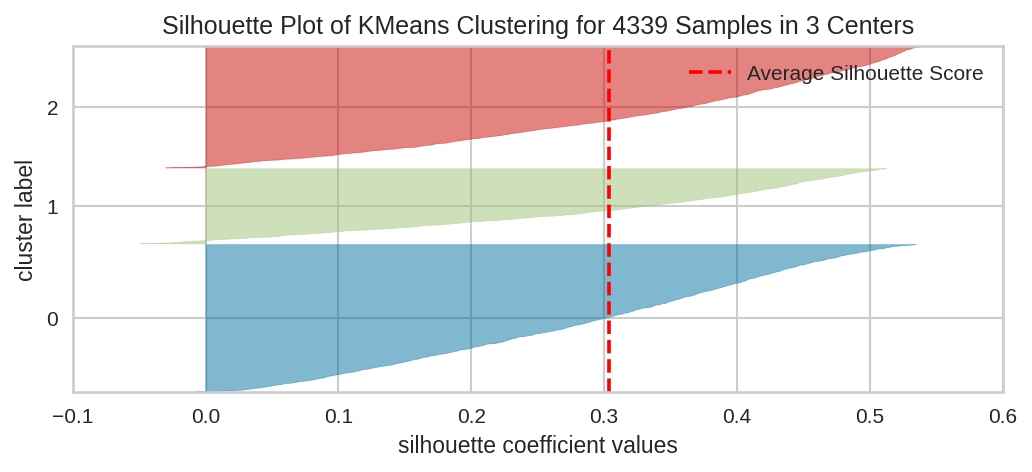

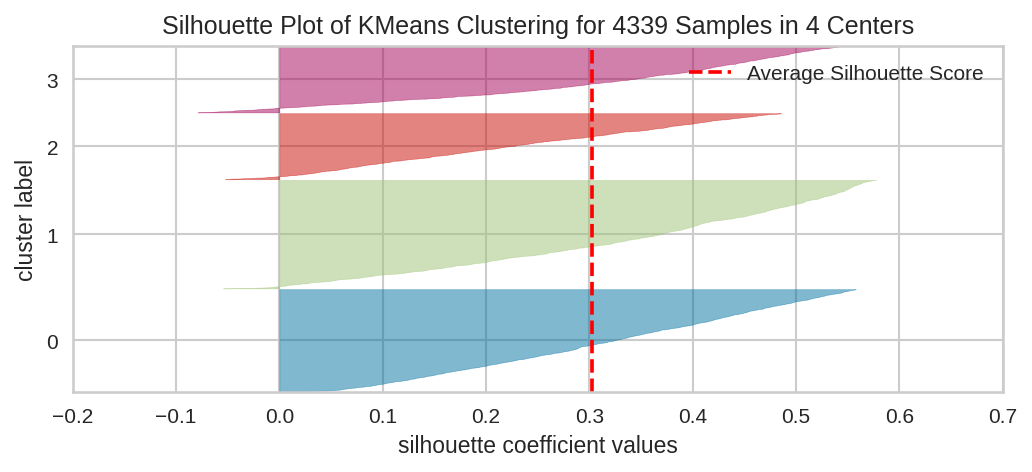

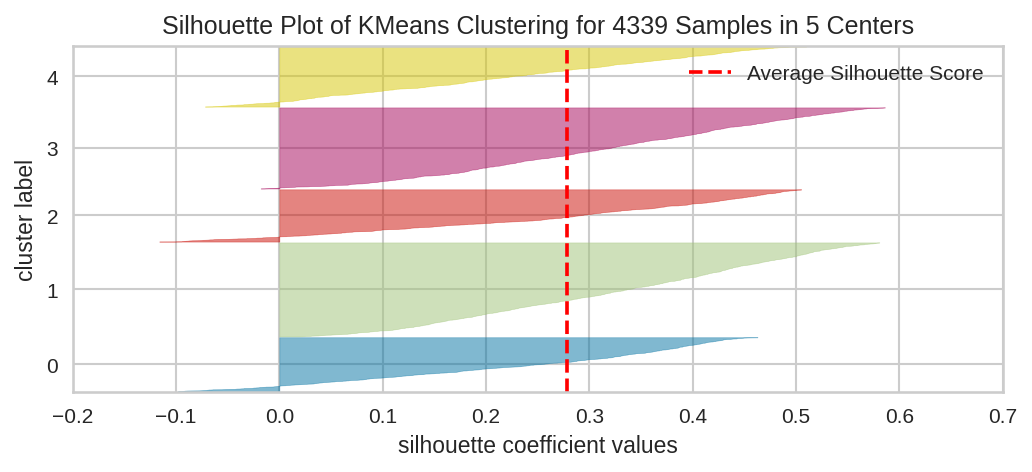

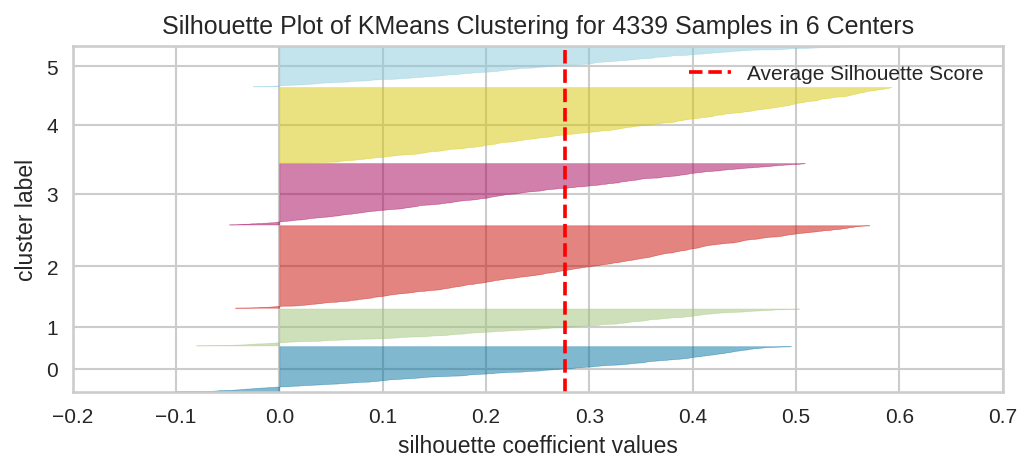

In [ ]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()


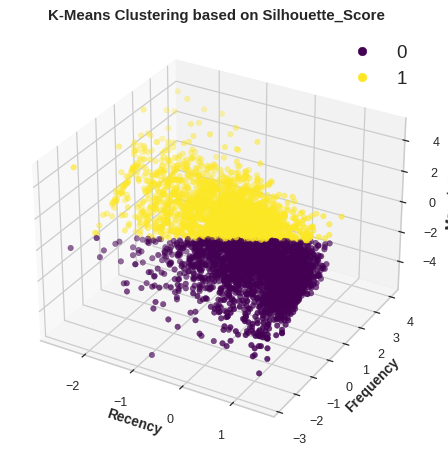

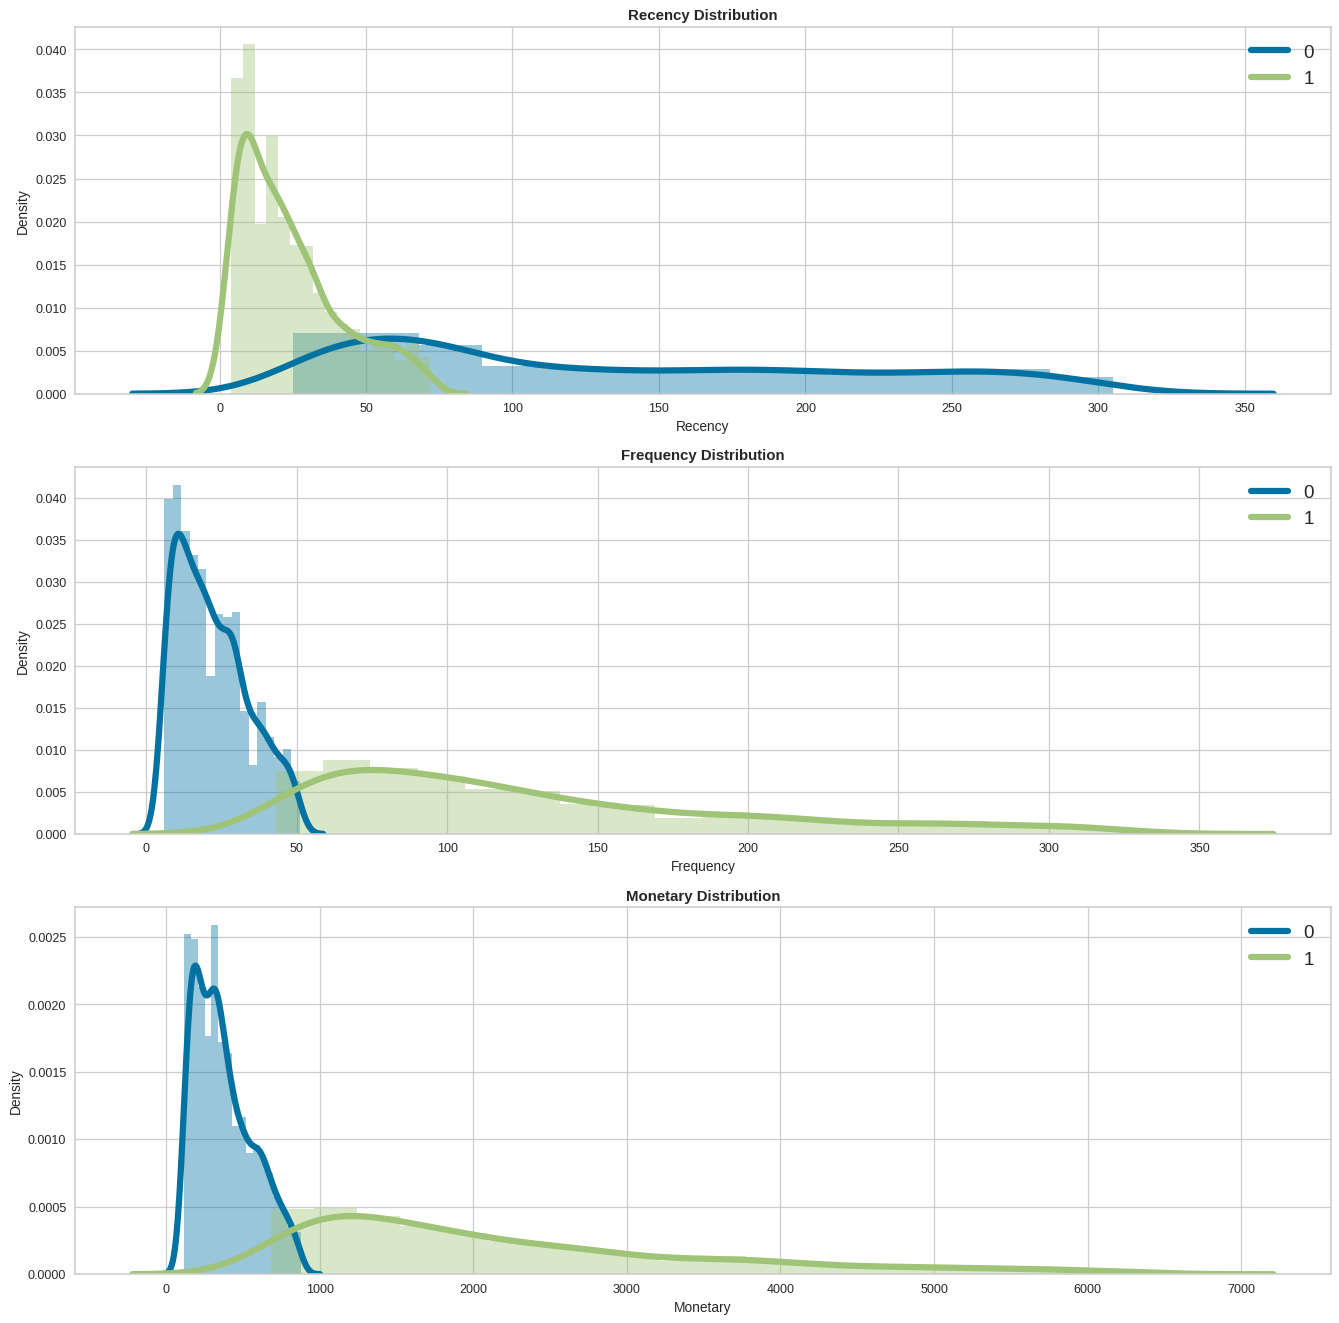



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
color="inferno"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)


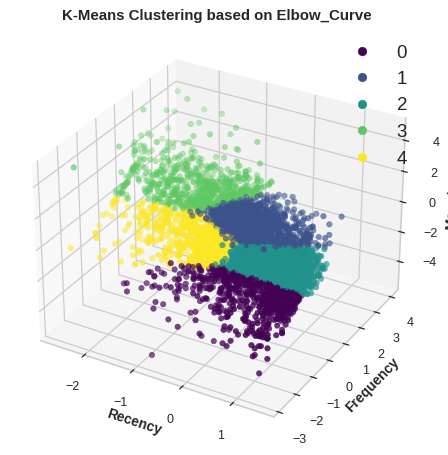

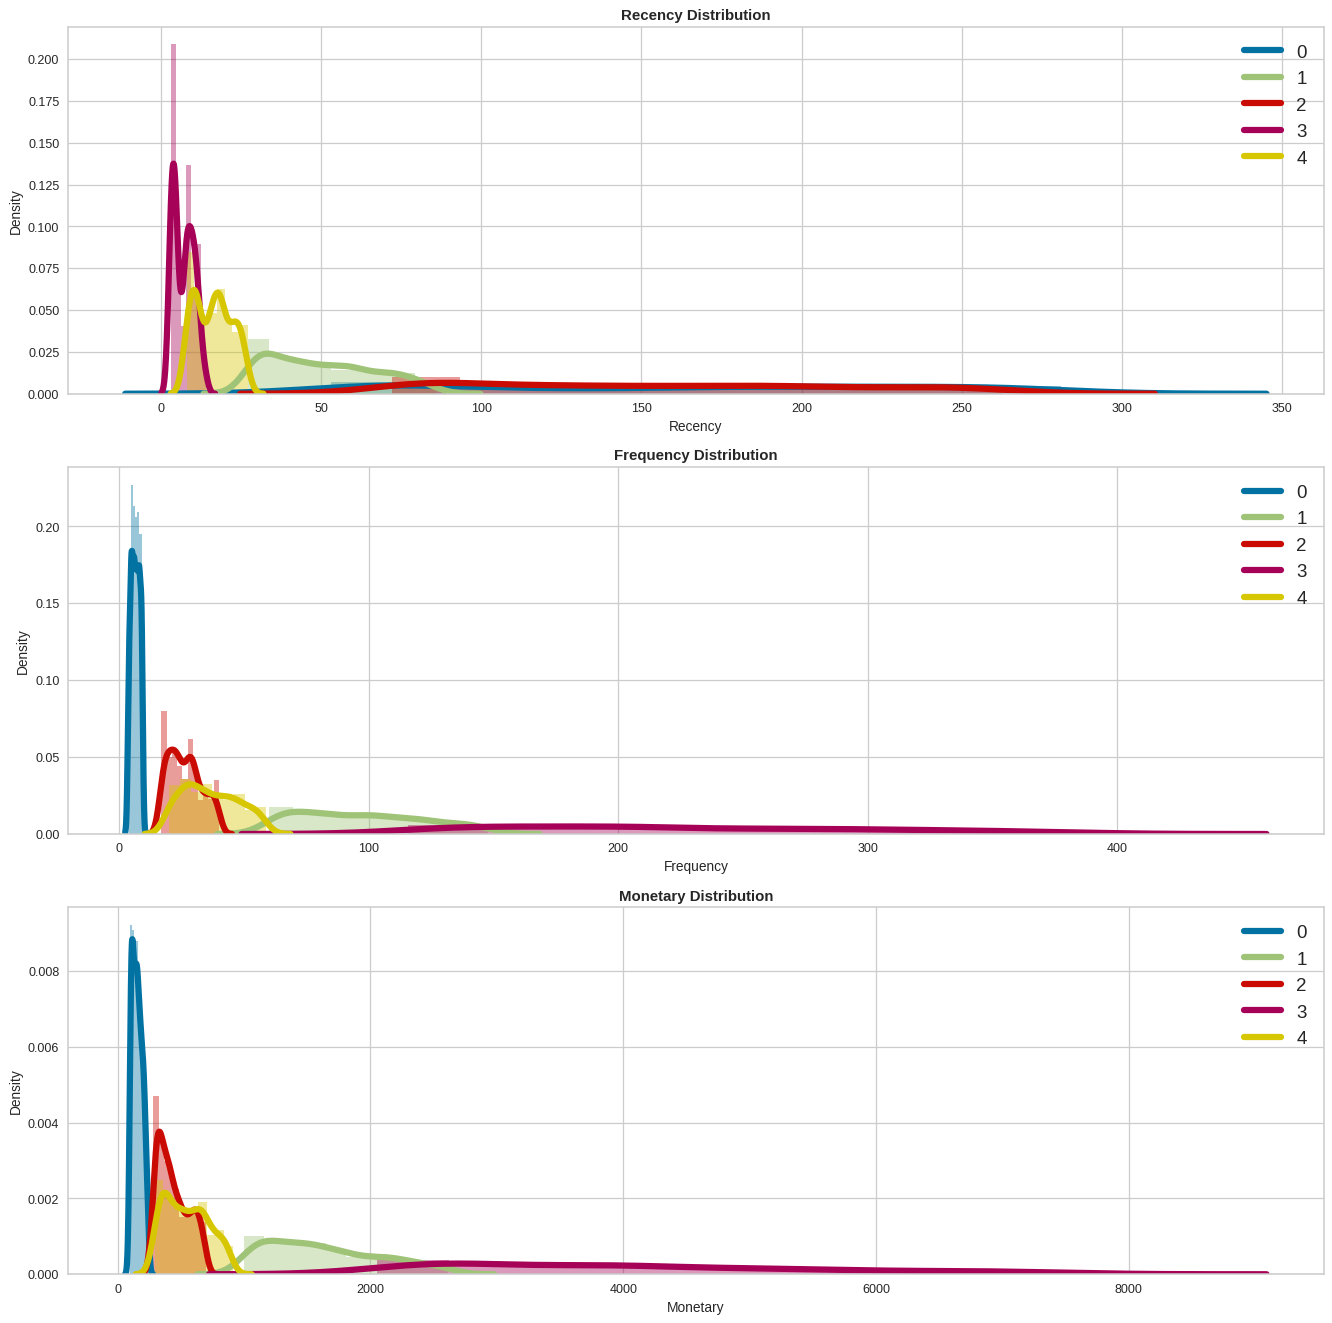



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
color="tab20"
conclusion[segment_name] = plots_stats_summary(y, segment_name,color, title, overlap_supress)

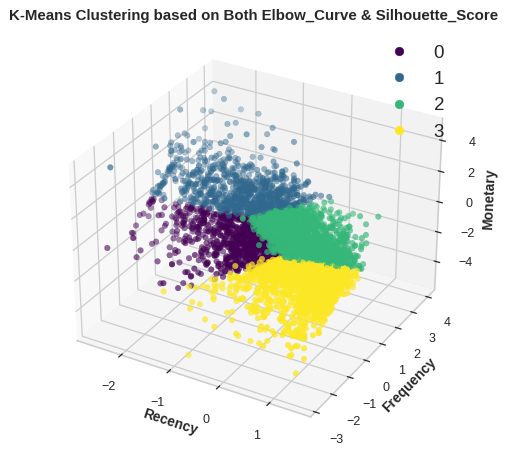

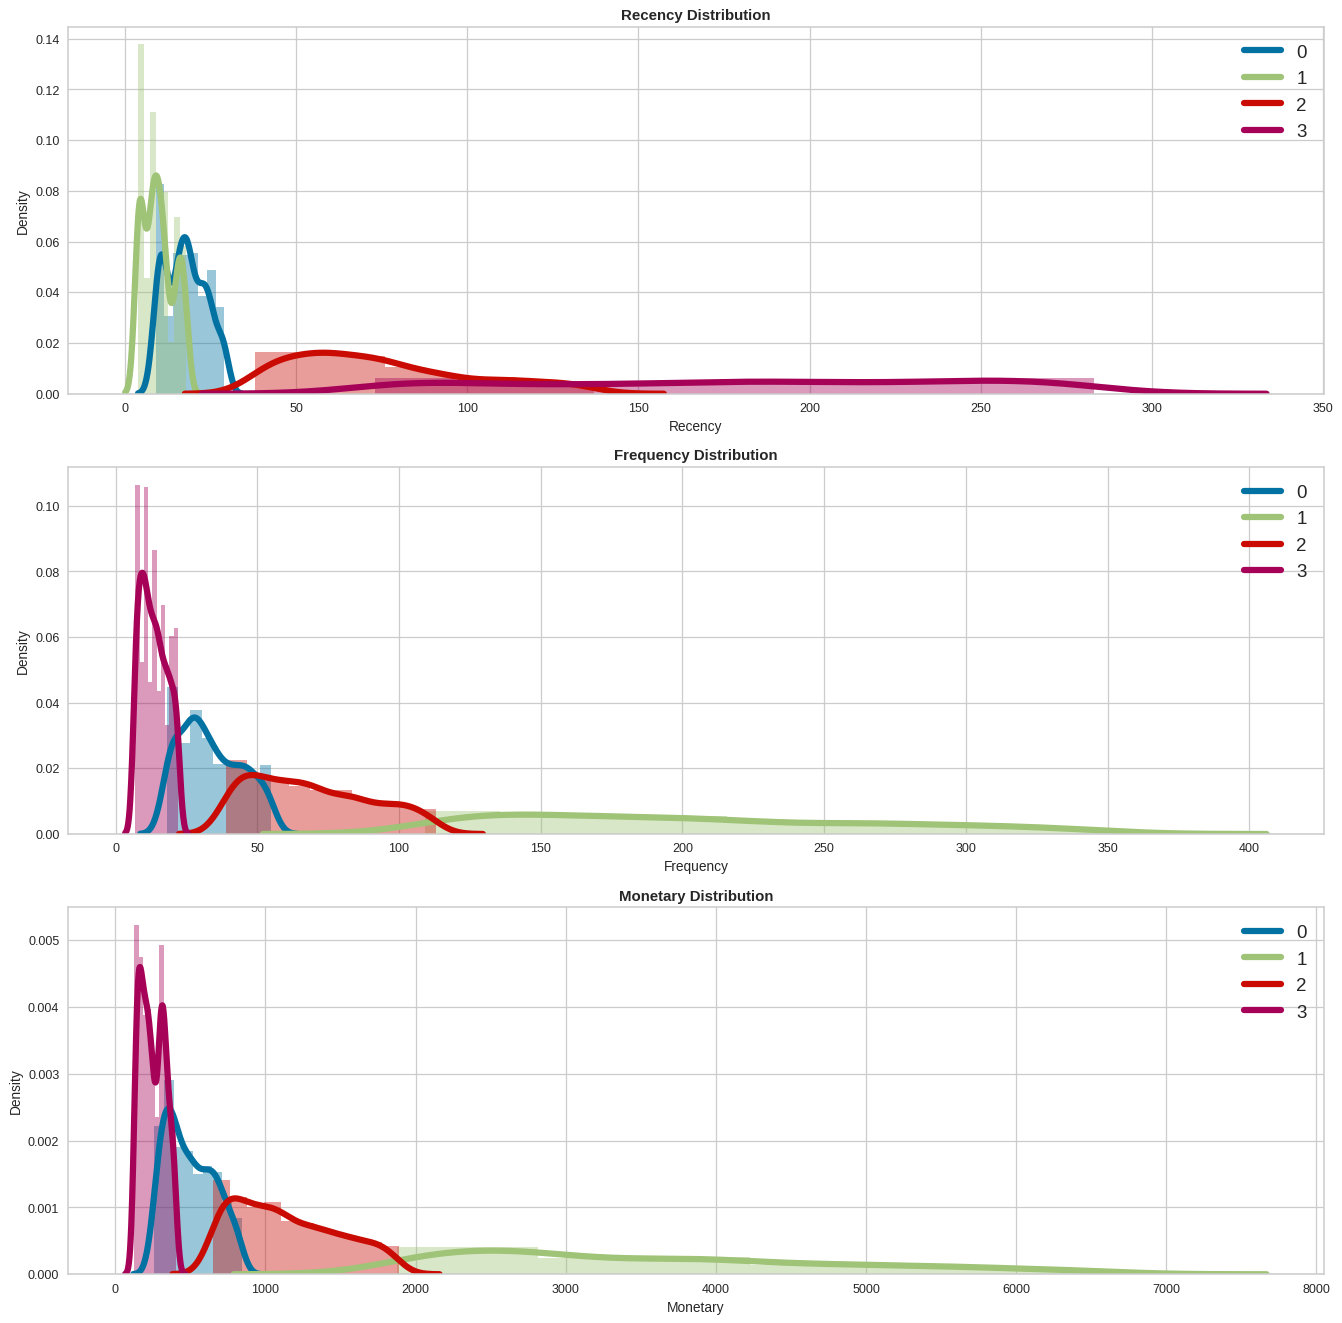



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.2
color="Pastel1"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## Hierarchical Clustering

* Hierarchical clustering is a popular unsupervised machine learning algorithm used for clustering or grouping data points based on their similarity. It is a tree-like structure of nested clusters where the root node represents the entire dataset, and the leaves represent individual data points.

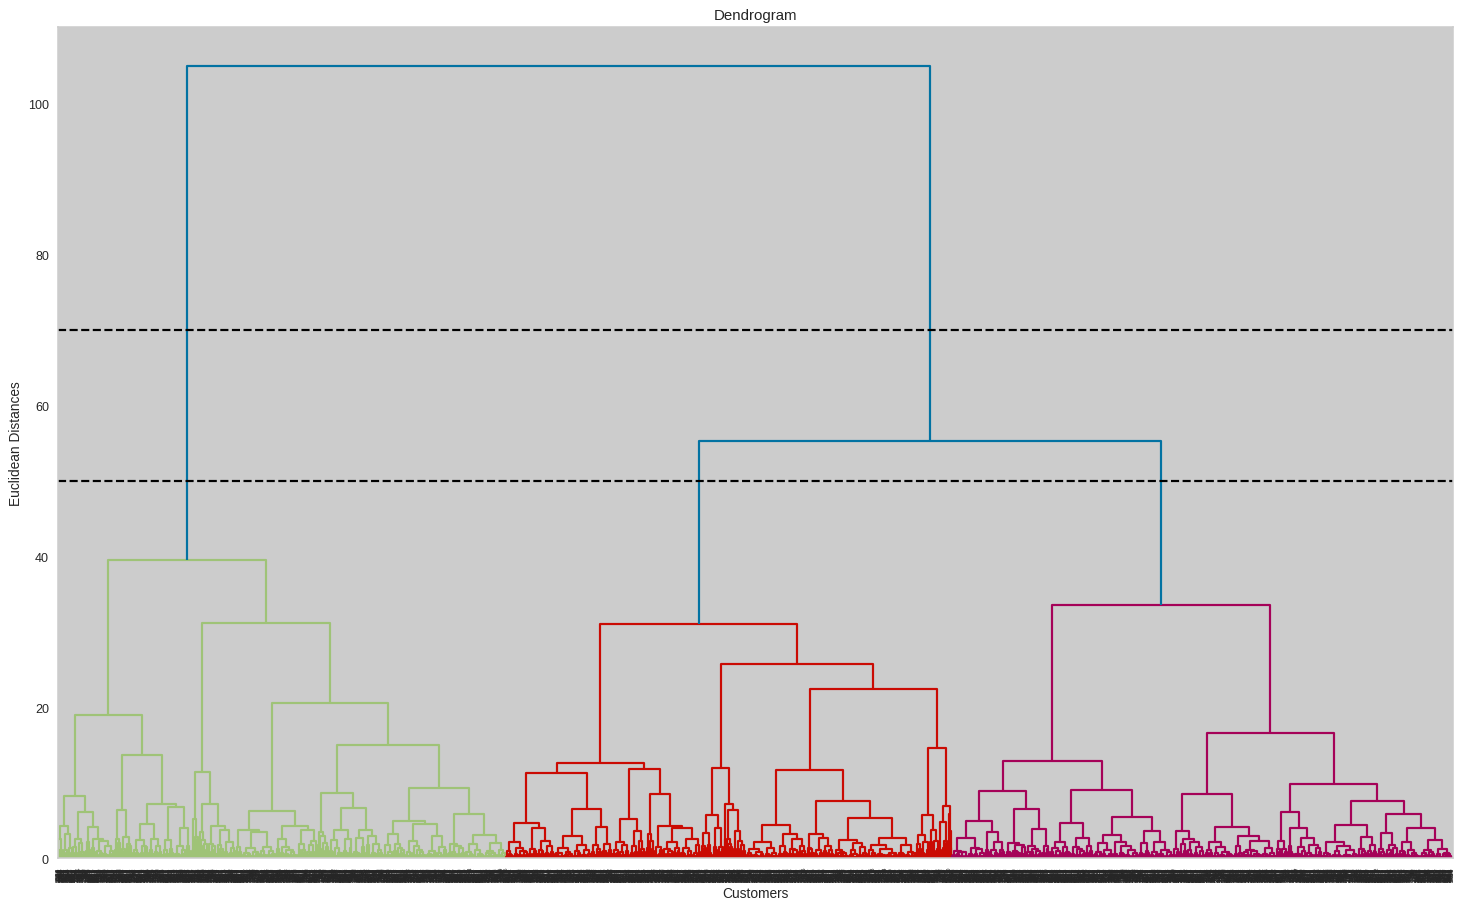

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

* We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

* We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.

* The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

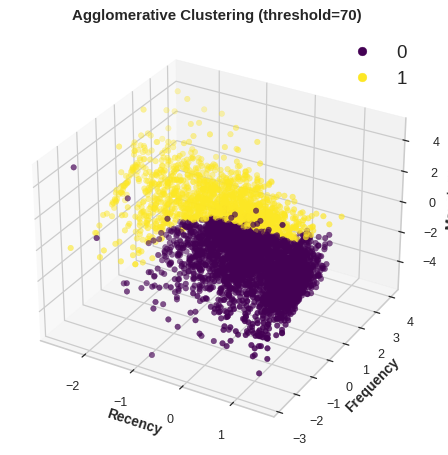

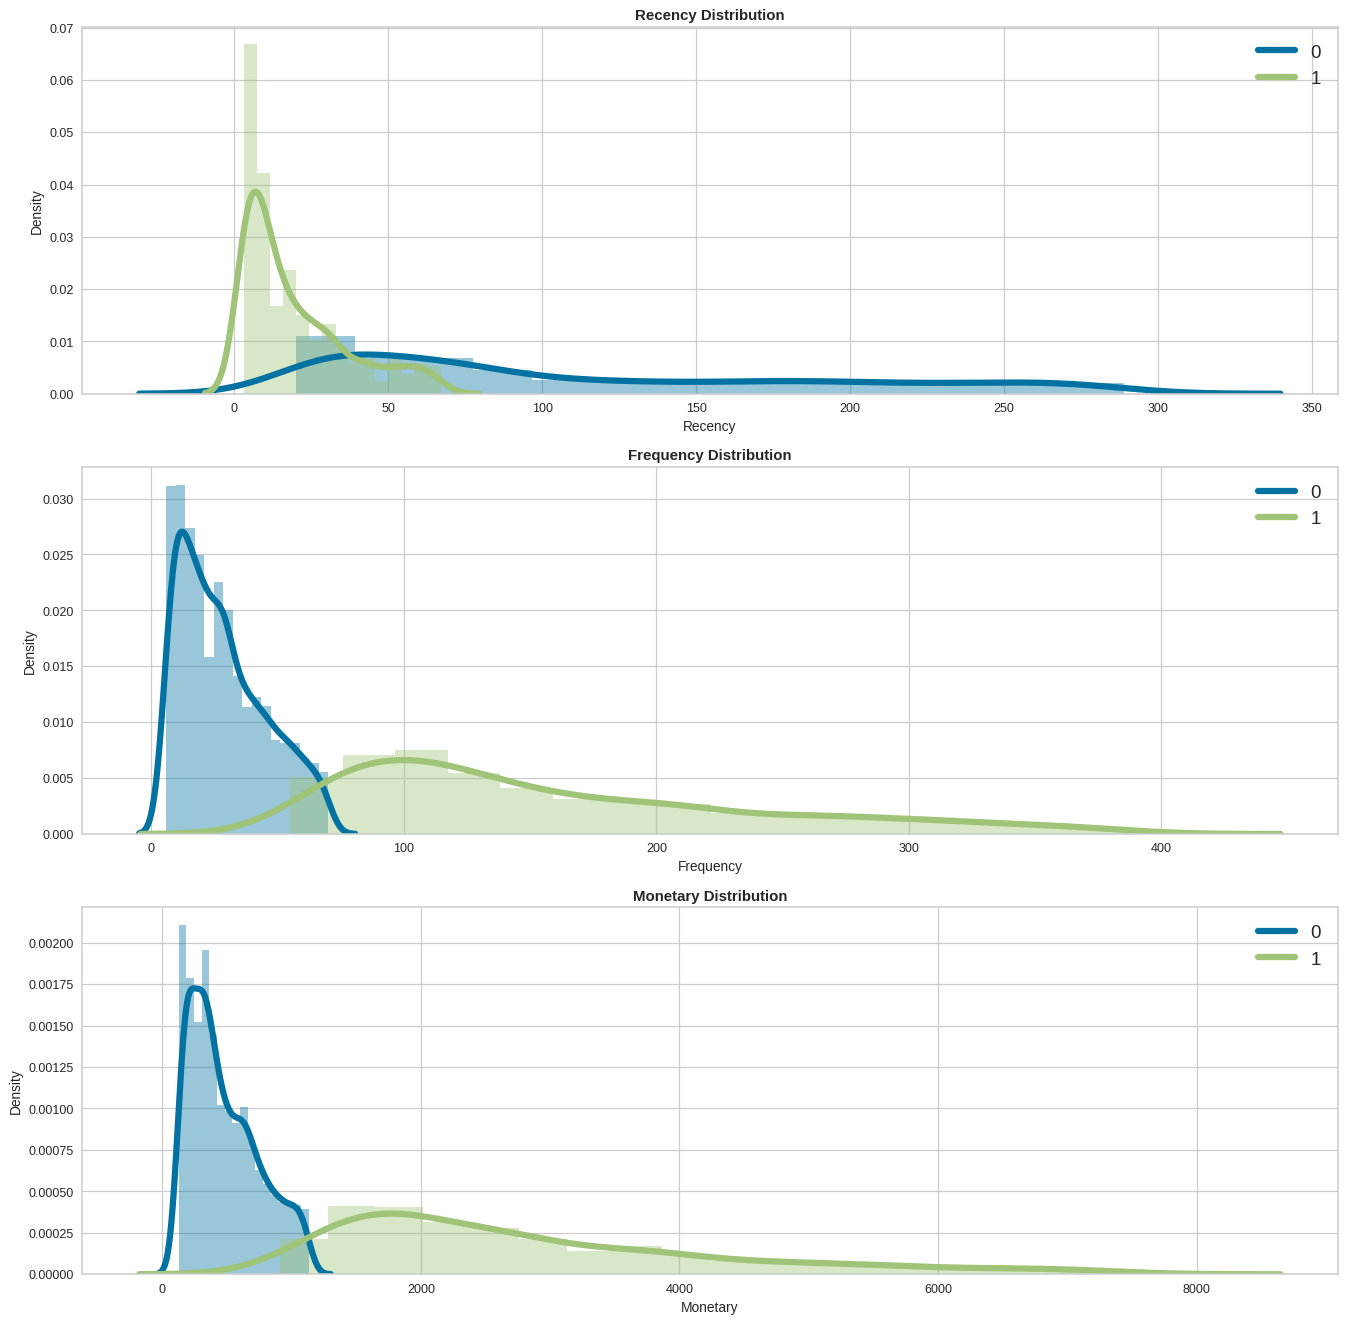



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
color="gnuplot"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

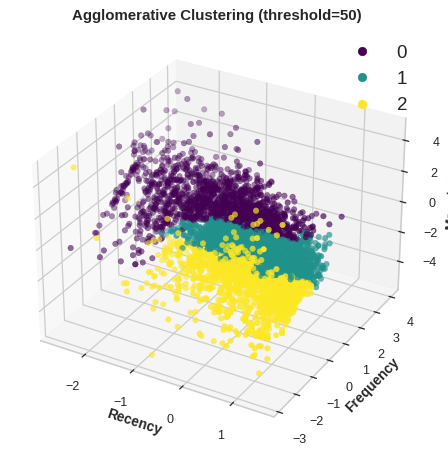

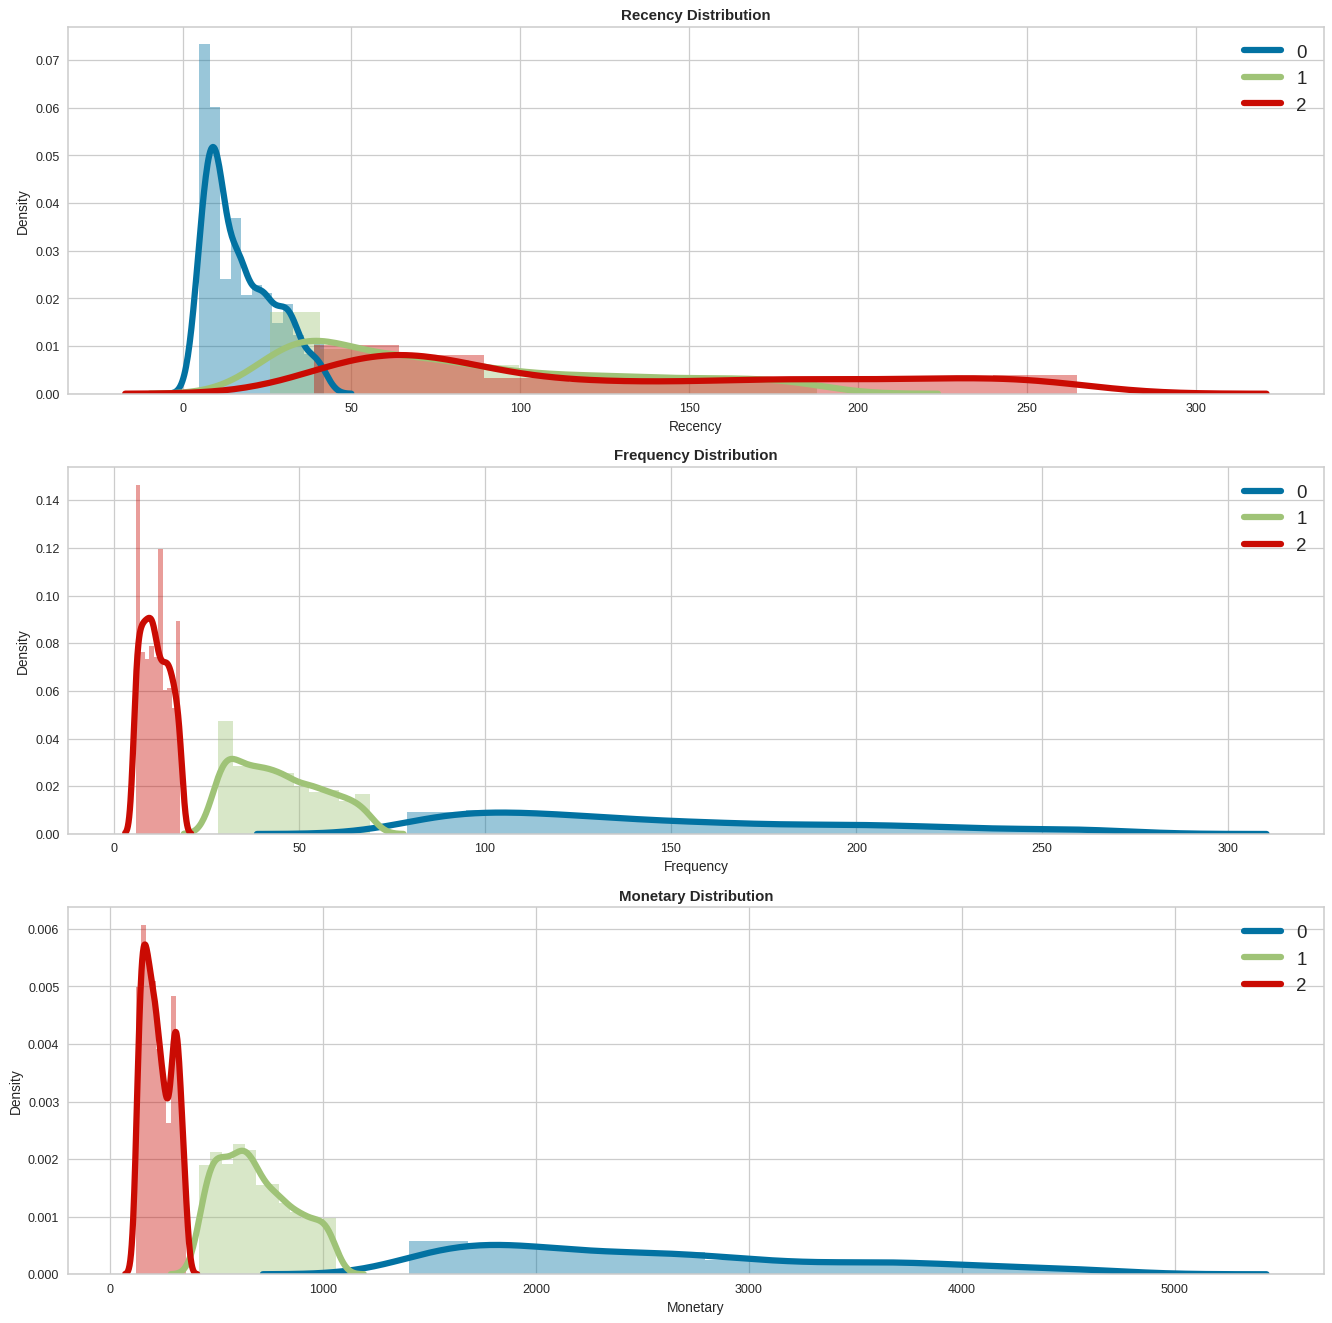



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.2
color="rainbow"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

## DBScan Clustering

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised machine learning algorithm used for clustering or grouping data points based on their density. It is a density-based clustering method that aims to discover clusters of arbitrary shape and size.

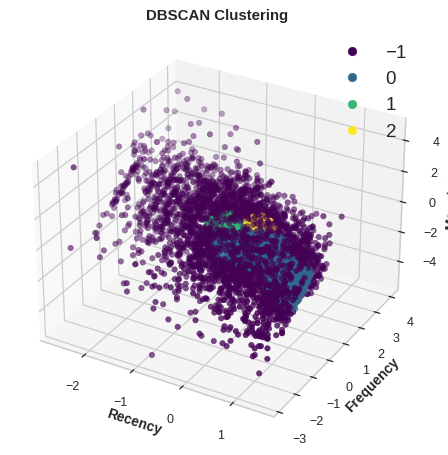

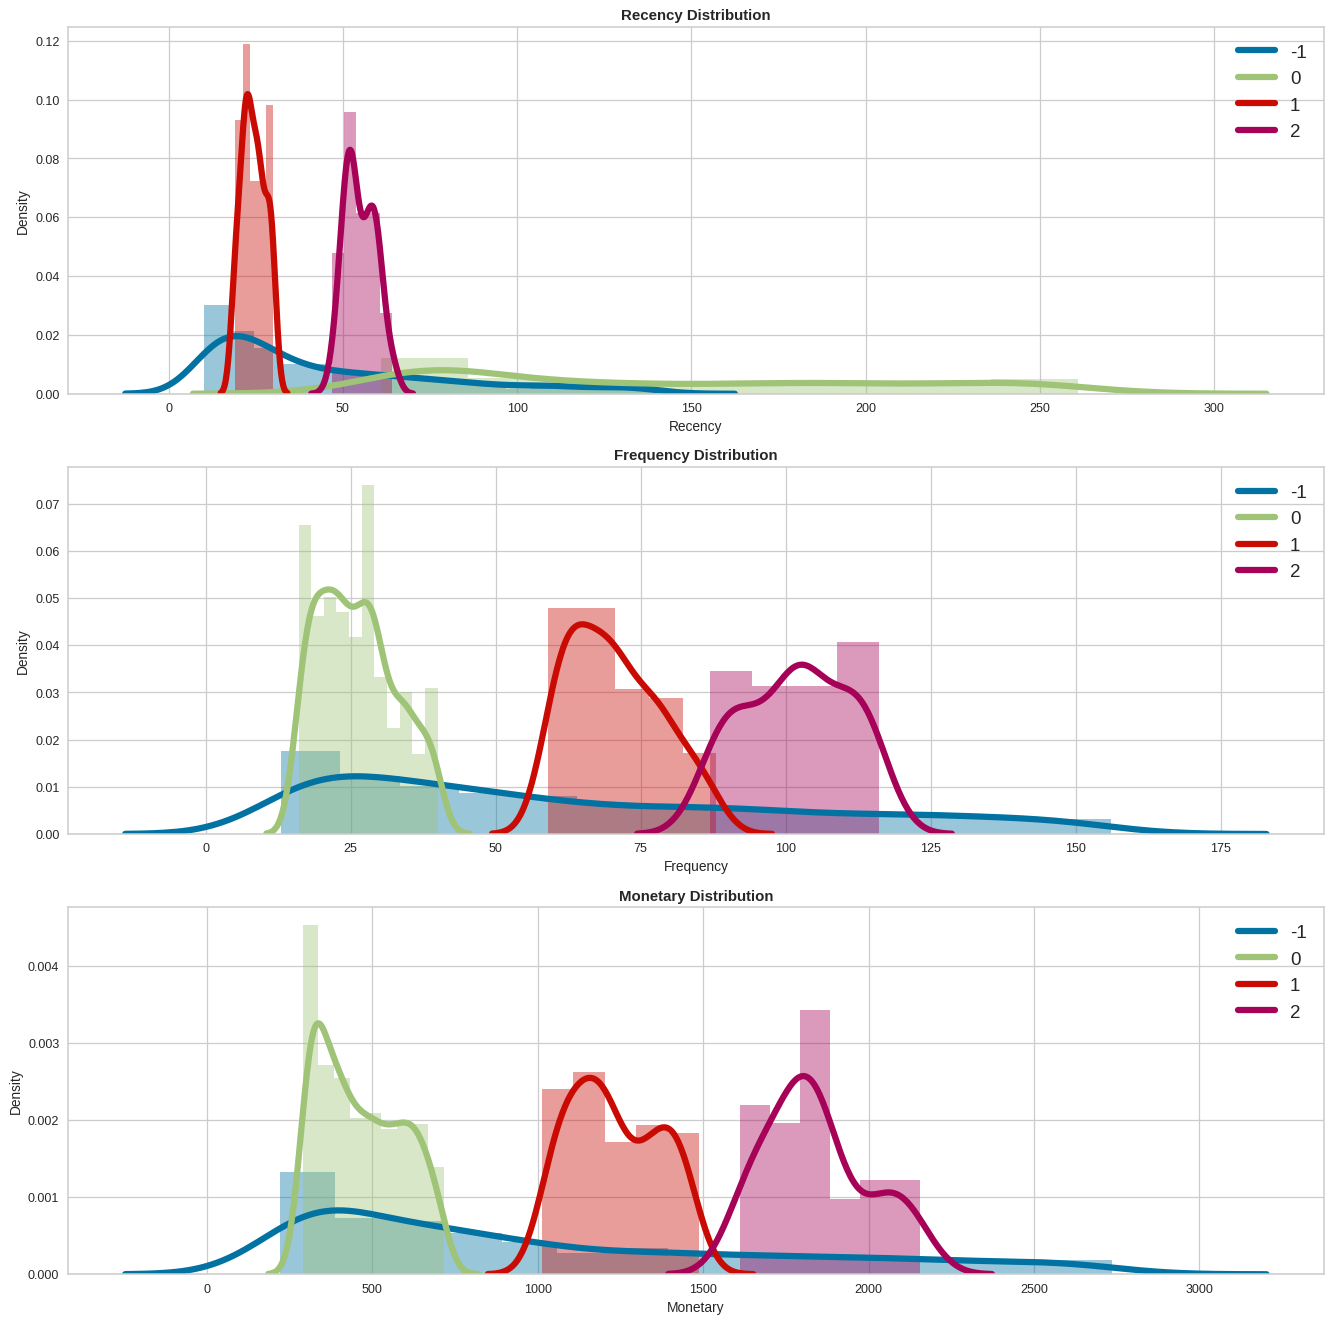



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
color="YlGnBu"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)


* Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.

* It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 4 clusters as shown above based on the hyperparameters defined.

In [ ]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,5,2,4,2,3,4]},
                        index=['', '', '', '', '', '', '', ''])
summary.T

\
Clusterer            Binning      Quantile Cut      K-Means           K-Means   
Criterion  RFM Score Binning  RFM Quantile Cut  Elbow Curve  Silhouette Score   
Segments                   4                 4            5                 2   

                                                                               \
Clusterer                         K-Means     Agglomerative     Agglomerative   
Criterion  Elbow Curve & Silhouette Score  Dendogram (y=70)  Dendogram (y=50)   
Segments                                4                 2                 3   

                                    
Clusterer                   DBSCAN  
Criterion  eps=0.2, min_samples=25  
Segments                         4

In [ ]:
# print the all summary
color=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu']
for i,segment_name in enumerate(conclusion):
  dataframe=conclusion[segment_name][1]
  display(dataframe.reset_index().style.set_properties(**{'text-align': 'center'}).hide_index().
          background_gradient(cmap=color[i]))
  print("--"*50)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


# **7.Conclusion**


1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.

2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.

3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the algorithms and the statistics extracted from the data.

4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.

5. The insights obtained from the clustering results can be used to create targeted marketing strategies, improve customer experience, and increase customer retention for the online retail company. For instance, the company can use the segment information to offer personalized product recommendations and promotions to each segment, improving their shopping experience and ultimately driving sales.